<div dir="rtl">
תשובה לשאלה 2:
פירוט  המחברת Basic Time Series Analysis & Feature Selection:
•	שינוי הprice_doc  ללוג שלו, פעולה זאת בעצם מקלה על הקריאה של המחירים והופכת אותה לפשוטה וגורמת למשתנה להתקרב לנורמלית.

•	בדיקת שינוי מחירים לאורך זמן, יש שלושה פיצ'רים של זמן (כל החודשים, ממוצע חודשים  וכל הימים) על מנת לבדוק את הטרנדים נוצר boxplot לכל פיצ'ר וכך נבדק ויזואלית האם אפשר להסיק מסקנות על טרנדים לאורך זמן מסוים. ניתן להסיק מגרפים אלו היא אין טרנד שניתן להבין לפי התפלגות המחירים לאורך הזמן.

•	מחיקת ערכים חסרים, מחיקת כל הפיצ'רים עם יותר מ20% NA. פעולה זאת באה לצמצמם את כמות הפיצ'רים בשביל לפשט את המודל.

•	בחירת פיצ'רים:
1) קורלציה – בדיקת קורלציה בין משתנה המטרה לשאר הפיצ'רים על מנת למצוא את  50 הפיצ'רים עם הקורלציה הגבוהה. נוסף חסם תחתון לקורלציה, כלומר כל משתנה עם קורלציה גבוהה מ0.01 נשאר. פעולה זאת צמצמה את הפיצ'רים ל40 והשאירה רק את הרלוונטיים ביותר. לאחר מכן, בוצעה בדיקת קורלציה בין הפיצ'רים לעצמם, זה בדק האם יש פיצ'רים עם התאמה מלאה, כלומר פיצ'ר שמתאר את אותו דבר. לאחר בדיקה זאת התגלו 5 פיצ'רים אשר נמחקו ולבסוף נשארו 35 פיצ'רים חשובים.
2)  XGBoost – בוצעה רגרסיית XGBoost על הדאטה וממנה נבחרו 99 פיצ'רים החשובים ביותר. התגלה נקודה מעניינית שלמרות שלא ראינו טרנדים ברורים לאורך זמן, הפיצ'רים של הזמנים התגלו כפיצ'ר חשוב.
3) לבסוף נוצרה רשימה שהיא חיבור בין הפיצ'רים של הקורלציה לבין הפיצ'רים של המודל XGBoost. שילוב הרשימות בעצם נותן מידע על קשרים ליניאריים (קורלצייה) ומידע של קשרים יותר מסובכים ( (xgboost. פעולה זאת נעשתה על מנת לשפר את המודל הסופי ע"י הוספת המימדים שנוצרו מהקשרים .
•	הכנת הדאטה הסופי עם הפיצ'רים הנבחרים:
1) טיפול בערכים חסרים – מתוך כל אחד מ- 126 הפיצ'רים שנבחרו הוחלפו הערכים החסרים בערכים עם כמות ההופעות הגבוהה ביותר (most_frequent).
2) פתיחת דאטה פריים חדש עם הפיצ'רים המלאים והפיכתם לדאטה מנורמל בעזרת רגולציית 2.L המטרה בפעולה זו היא הקטנת הסיבוכיות וגורמת לפיצ'רים מסוימים להיות פחות דומיננטיים ובכך מוביל לביצועים טובים יותר של המודל.
•	ביצוע Kfold, שהיא טכניקת חלוקה של סט האימון לביצוע cross validation. תהליך זה לפי ה-k מחלק את הסט המלא לk סטים באופן רנדומלי – k-1 סטים של אימון ואחד לוולידציה ומבצע זאת k פעמים. לאחר מכן המודל מאמן את סט האימון והערכתו ניתנת על ידי הוולידציה, את הערכה עושים לפי מדד rmse. בנוסף לכך המודל מתאמן 1000 סבבים או שנעצר מוקדם יותר אם ההערכה של האימון לא משתפרת במשך 50 סיבובים. פעולת העצירה נוצרה בשביל לקצר את תהליך ההרצה ולמנוע overfitting. ולסיכום כל התהליך בוצע על מנת שנוכל להעריך את ביצועי המודל על נתונים שהוא עדיין לא ראה.
נקודות לשיפור וביקורת:
•	גרף מחיר לאורך זמן לפי ימים – הגרף לא אינטואיטיבי בגלל כמות הימים הגדולה בציר ה-x והוא גם הוסיף שאין לו מהימנות בגרף לאחר מכן בו הוא הראה שאין מספיק כמות של מכירות במספר רב של ימים. ולכן ניתן היה להוריד אותו.
•	הורדת הפיצ'רים שיש בהם מעל 20 אחוז ערכים חסרים – ניתן היה לבחור בשיטות אחרות על מנת להתמודד עם הערכים החסרים כמו הוספת חציון או סוג של regression imputer שיכלו למלא את הערכים החסרים. יכול להיות שבעקבות הורדת הפיצ'רים הורדו פיצ'רים שיכלו לתרום למודל.
</div>

<div dir="rtl">

פירוט מחברת Simple Exploration Notebook – Sberbank:
•	התבוננות על משתנה המטרה: תחילה נוצר גרף scatter plot על מנת לבדוק outliers ונראה שאין נקודות חריגות. לאחר מכן בוצעה היסטוגרמה אך הוא היה מוטה עם זנב ימני ולכן נעשה פונקציית לוג שבזכותה נוח לראות את ההתפלגות. היא פחות מוטה ונראית כמו התפלגות נורמלית.

•	גרף של עליית המחירים: גרף זה מראה את התפלגות המחירים לאורך החציון בכל חודש. ניתן ללמוד שישנה מגמה של עלייה לינארית מחודש מסוים ועד הסוף.

•	התבוננות על הדאטה: תחילה נבחנו סוגי הפיצ'רים ורובם היו מספריים. בהמשך נבדקו כמות הערכים החסרים מכל הפיצ'רים המספריים. תהליך זה הוא למעשה הבנה לפעולה עתידית . בהמשך שונו המשתנים הקטגוריאליים לערכים מספריים בעזרת קידוד ומיפוי כדי שהמודל יוכל לעבוד עם משתנים אלה.

•	אימון מודל xgboost על הדאטה: תהליך זה בוצע על מנת למצוא את הפיצ'רים החשובים ביותר. מפיצ'רים אלו נלקחו ארבעת החשובים ביותר.

•	חקירת ארבעת הפיצ'רים הנחשבים: לפיצ'ר full_sq בוצעה בדיקה scatter plot על מנת לבדוק האם יש קשר ויזואלי והאם אפשר לצפות outliers. לפיצ'ר life_sq בוצעה בדיקה עם kde על מנת ליצור גרף צפיפות. ובדרך זאת ניתן לראות קורלוציה בין שטח הדירה למחיר. לפיצ'ר floor בוצעה בדיקה של חציון המחיר לפי קומה וניתן היה לראות שכאשר מספר הקומה גדל כך המחיר עולה. ולפיצ'ר max_floor בוצעה בדיקת boxplot על מנת לראות ויזואלית את האחוזונים. בשני הגרפים הראשונים בוצעה הורדת outliers של כל פיצ'ר לפי אחוזון מסוים שנבחר. בסה"כ גרפים אלו בוצעו על מנת לראות קשר ומגמתיות בין פיצ'רים אלה למשתנה המטרה.

נקודות לשיפור וביקורת:
•	החלפת משתנים קטגוריאליים בערכים מספריים – דרך זאת יכולה לייצר בעיה בכך שהיא מייצרת סדר למשתנים הקטגוריאליים אך הסדר הוא לא בהכרח קיים. דרך אשר יכלה לשפר היא שימוש בOne-HotEncoding  כדי שהמודל יבין שלא קיים סדר בכל קטגוריה וכי רוב הפיצ'רים הקטגוריאליים הם איכותיים בדאטה הנתון מה שפחות מתאים ל LabelEncoder שבוצע.

•	בבדיקת הNA התגלה כמות גדולה של ערכים חסרים,  למרות שמודל הXGBOOST יודע לטפל בערכים האלה, עדיף לטפל בערכים אלה לפני הכנסתם למודל בעזרות שיטות שונות כמו מחיקת הפייצרים עם כמות גבוהה של ערכים חסרים, הכנסת החציון או הממוצע במקום ועוד.  

•	הגרפים שיצאו מlife_sq לא הראו מגמתיות מסוימת דבר זה כנראה נוצר בכך שאת הערכים החסרים החליפו באפס ומספר הערכים החסרים היה גבוה מה שהראה קורלציה  גבוהה  בערך 0. בנוסף לכך בגרף של max_floor היה טיפול לקוי בoutliers מה שגרם לכך שהיו מגמות שונות לאורך הגרף וכיוון המגמה החיובי של עליית המחירים נהפך ללא ברור כאשר גובה הקומה המקסימלי עלה.

</div>

<div dir="rtl">
התחלת שאלה 3
</div>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.metrics import mean_squared_error
import pickle  
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer



Uploading the data

In [133]:
dtrain = pd.read_csv('C:\\Users\\odedw\\OneDrive\\שולחן העבודה\בן גוריון\\עבודות הגשה בן גוריון\\שנה ג\\סטטיסטיקה\\למידת מכונה\\פרויקט סיום\\train_sber.csv')


Exploratory Data Analysis - תחילת חקירת הדאטה

In [134]:
# אחוזנים למשתנים מספריים
numerical_stats = dtrain.describe()
numerical_stats

id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05      0.851805     28.265979      0.880148   
min        1.000000  0.000000e+00      0.000000      0.000000      1.000000   
25%        1.000000  1.967000e+03      1.000000      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000      2.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000      3.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000     33.000000   

       ...  cafe_count_5000_price_2500  cafe_count_5000_price_4000  \
count  ...                30471.000000                30471.000000   
mean   ...                   32.058318                   10.783860   
std    ...                   73.465611                   28.385679   
min    ...                    0.000000                    0.000000   
25%    ...                    2.000000                    1.000000   
50%    ...                    8.000000                    2.000000   
75%    ...                   21.000000                    5.000000   
max    ...                  377.000000                  147.000000   

       cafe_count_5000_price_high  big_church_count_5000  church_count_5000  \
count                30471.000000           30471.000000       30471.000000   
mean                     1.771783              15.045552          30.251518   
std                      5.418807              29.118668          47.347938   
min                      0.000000               0.000000           0.000000   
25%                      0.000000               2.000000           9.000000   
50%                      0.000000               7.000000          16.000000   
75%                      1.000000              12.000000          28.000000   
max                     30.000000             151.000000         250.000000   

       mosque_count_5000  leisure_count_5000  sport_count_5000  \
count       30471.000000        30471.000000      30471.000000   
mean            0.442421            8.648814         52.796593   
std             0.609269           20.580741         46.292660   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000         11.000000   
50%             0.000000            2.000000         48.000000   
75%             1.000000            7.000000         76.000000   
max             2.000000          106.000000        218.000000   

       market_count_5000     price_doc  
count       30471.000000  3.047100e+04  
mean            5.987070  7.123035e+06  
std             4.889219  4.780111e+06  
min             0.000000  1.000000e+05  
25%             1.000000  4.740002e+06  
50%             5.000000  6.274411e+06  
75%            10.000000  8.300000e+06  
max            21.000000  1.111111e+08  

[8 rows x 276 columns]

In [135]:
# שינוי הערך החריג לממוצע של הפיצ'ר
dtrain.loc[dtrain['state'] == 33, 'state'] = 4

# שינוי הערך החריג לממוצע של השנים 2005-2009
dtrain.loc[dtrain['build_year'] == 20052009, 'build_year'] = 2007

In [136]:
# הבנה של הדאטה והכרת סוגי המשתנים 
numerical_columns = dtrain.select_dtypes(exclude=['object']).columns
categorical_columns = dtrain.select_dtypes(include=['object']).columns
print('Number of numerical columns:', len(numerical_columns))
print('Number of categorical columns:', len(categorical_columns))

Number of numerical columns: 276
Number of categorical columns: 16


Housing Internal Characteristics


<AxesSubplot:>

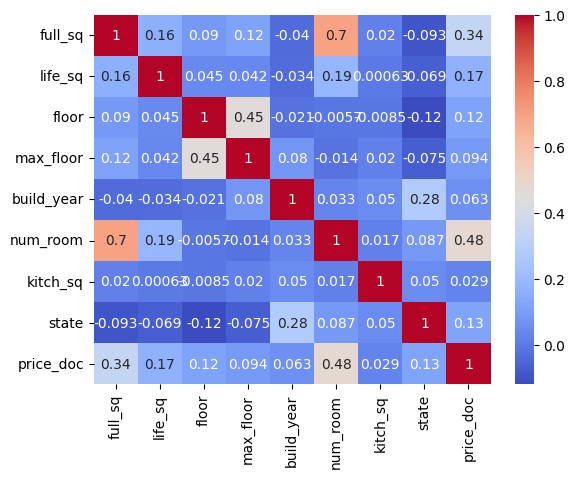

In [137]:
#בדיקת קורלציה לפייצרים בייתים
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']
corr = dtrain[internal_chars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


<div dir="rtl">
פלוט קורלציה-
לקחנו מפה את הפייצרים עם הקרולציה הגבוהה ביותר עם המחיר
ובעצם חקרנו אותם
בנוסף חקרנו גם הקומה והמקס קומה כי גם להם היה קורלציה גבוהה מאוד
</div>

In [138]:
#בדיקה האם יש ערכים לא הגיונים
invalid_rows = dtrain[dtrain['life_sq'] > dtrain['full_sq']]
#בדיקה ויזולאית 
invalid_rows[['full_sq', 'life_sq']]

full_sq  life_sq
1084        44    281.0
1188         9     44.0
1822        18     38.0
1863        30    178.0
2009         5     40.0
4385        73    426.0
6336        37    191.0
6531        80     88.0
6993        73     77.0
7208        31    195.0
8101        37     38.0
9237        47    301.0
9256        77    458.0
9482        52     53.0
9646        82    802.0
11332        1     40.0
11711       56     58.0
11784       46     59.0
12569       56     60.0
13546       79   7478.0
13629       45    259.0
13797       32    163.0
14799       73     77.0
16067       50     52.0
16116       84     85.0
16284       33     62.0
20672       44     45.0
21080       52    349.0
22412        1     47.0
22611       37     38.0
22804       54     55.0
24296        0     77.0
24428       74     78.0
26264        1     60.0
26342       75    435.0
26363        1     64.0
29302       56     57.0

In [139]:

# להמיר את הערכים האלה לNA
# Replace 'life_sq' values greater than 'full_sq' with NaN
dtrain.loc[dtrain['life_sq'] > dtrain['full_sq'], 'life_sq'] = np.nan



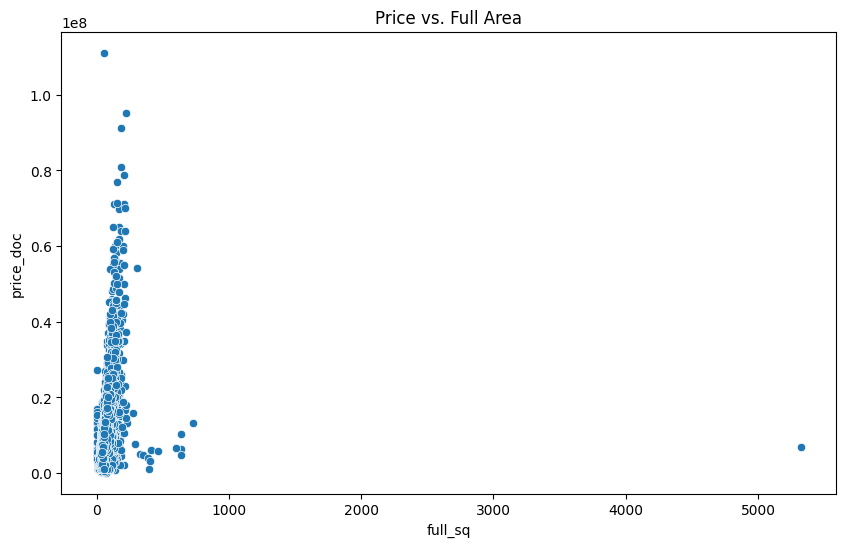

In [140]:
# full_sq against price_doc
plt.figure(figsize=(10, 6))
sns.scatterplot(x='full_sq', y='price_doc', data=dtrain)
plt.title('Price vs. Full Area')
plt.show()

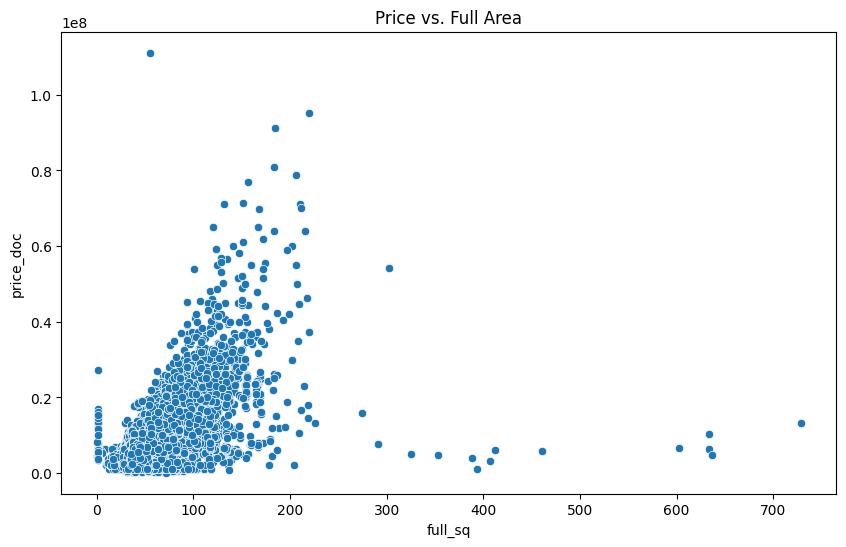

In [141]:
# שיפור הגרף ללא האוטלירים
plt.figure(figsize=(10, 6))
sns.scatterplot(x='full_sq', y='price_doc', data=dtrain[dtrain['full_sq'] < 2000])
plt.title('Price vs. Full Area')
plt.show()


In [142]:

# שינוי ערכים חריגים לNA
for col in ['life_sq', 'full_sq']:
    dtrain.loc[dtrain[col] < 5, col] = np.nan

# החלפת הערכים החריגים במשתנה גודל המטבח בNA לפי בדיקה האם הערך קטן מהערך של הדירה עצמה או האם גודל המטבח היה שווה ל0 או 1
dtrain.loc[(dtrain['kitch_sq'] >= dtrain['life_sq']) | dtrain['kitch_sq'].isin([0, 1]), 'kitch_sq'] = np.nan

# החלפת ערכי מג'יק נאמברס בNA 
dtrain.loc[(dtrain['full_sq'] > 210) & (dtrain['life_sq'] / dtrain['full_sq'] < 0.3), 'full_sq'] = np.nan

# ערכים גדולים מ 300 הוחלפו בNA
dtrain.loc[dtrain['life_sq'] > 300, ['life_sq', 'full_sq']] = np.nan

<div dir="rtl">
נראה יותר טוב ורואים קשר בין המחיר לגודל הדירה
</div>

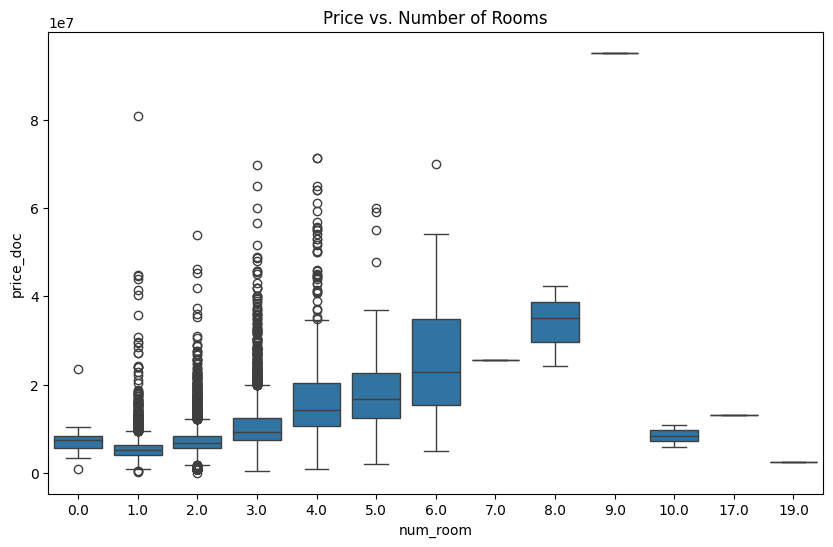

In [143]:
#num_room against price_doc
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_room', y='price_doc', data=dtrain)
plt.title('Price vs. Number of Rooms')
plt.show()

In [144]:
#num_room value counts
dtrain['num_room'].value_counts()

num_room
2.0     8132
1.0     7602
3.0     4675
4.0      418
5.0       40
0.0       14
6.0        9
8.0        3
10.0       2
19.0       1
7.0        1
17.0       1
9.0        1
Name: count, dtype: int64

In [145]:
#אחרי הסתכלות בגרף נראה שיש ערכים לא הגיוניים והמחיר לא מצדיק את כמות החדרים אז הפכנו אותם לNA
dtrain.loc[dtrain['num_room'] == 0, 'num_room'] = np.nan
dtrain.loc[dtrain['num_room'] == 10, 'num_room'] = np.nan
dtrain.loc[dtrain['num_room'] == 17, 'num_room'] = np.nan
dtrain.loc[dtrain['num_room'] == 19, 'num_room'] = np.nan

In [146]:
#בדיקה האם 9 מצדיק את המחיר ולאור המחיר הגבוה וגודל הבית נראה שנכון
rows_with_9_rooms = dtrain[dtrain['num_room'] == 9]
rows_with_9_rooms[['full_sq','life_sq', 'num_room']]


full_sq  life_sq  num_room
28326    220.0    144.0       9.0

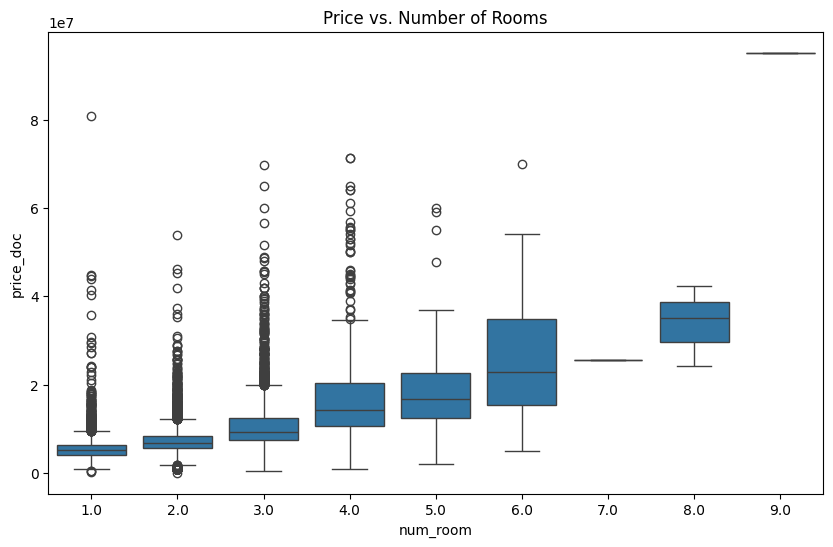

In [147]:
#num_room against price_doc
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_room', y='price_doc', data=dtrain)
plt.title('Price vs. Number of Rooms')
plt.show()

<div dir="rtl">
פלוט-הגרף ברור יותר ורואים קשר ישר בין גודל החדרים לעליית המחיר
</div>

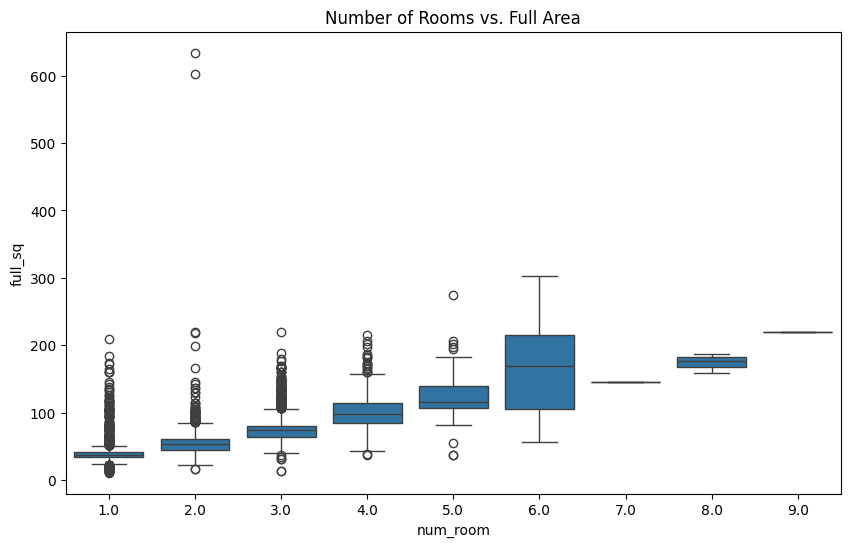

In [148]:
# num_room against full_sq
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_room', y='full_sq', data=dtrain)
plt.title('Number of Rooms vs. Full Area')
plt.show()

In [149]:
# אותו בדיקה כמו הקודמים
invalid_rows = dtrain[dtrain['floor'] > dtrain['max_floor']]

# Print the invalid rows
invalid_rows[['floor', 'max_floor', 'price_doc']]

floor  max_floor  price_doc
8216    13.0        0.0    5813760
8268     3.0        1.0    5427640
8499     2.0        0.0    6000000
8531     7.0        0.0    3842500
8912     5.0        0.0    3850000
...      ...        ...        ...
30398    5.0        1.0    4185400
30400    3.0        0.0   16748512
30426    1.0        0.0    7127255
30439   12.0        0.0    8535937
30450    5.0        0.0   12610000

[1493 rows x 3 columns]

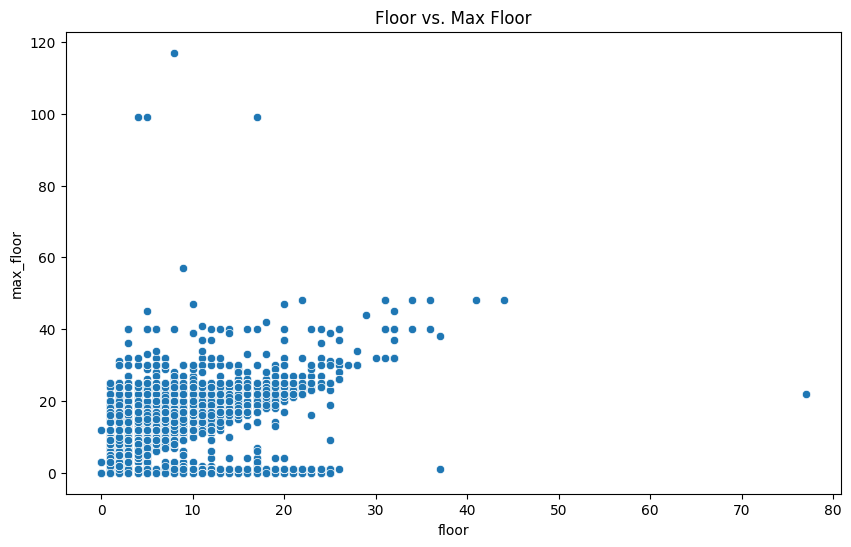

In [150]:
# floor againt max_floor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor', y='max_floor', data=dtrain)
plt.title('Floor vs. Max Floor')
plt.show()


In [151]:
# שינוי ערכים אלה לחריגים
dtrain.loc[dtrain['floor'] > dtrain['max_floor'], 'max_floor'] = np.nan
# Replace 'max_floor' and 'floor' values where both are 0 with NaN
dtrain.loc[(dtrain['floor'] == 0) & (dtrain['max_floor'] == 0), ['max_floor', 'floor']] = np.nan

# Replace 'floor' values where 'floor' is 0 with NaN
dtrain.loc[dtrain['floor'] == 0, 'floor'] = np.nan

# Replace 'max_floor' values where 'max_floor' is 0 with NaN
dtrain.loc[dtrain['max_floor'] == 0, 'max_floor'] = np.nan

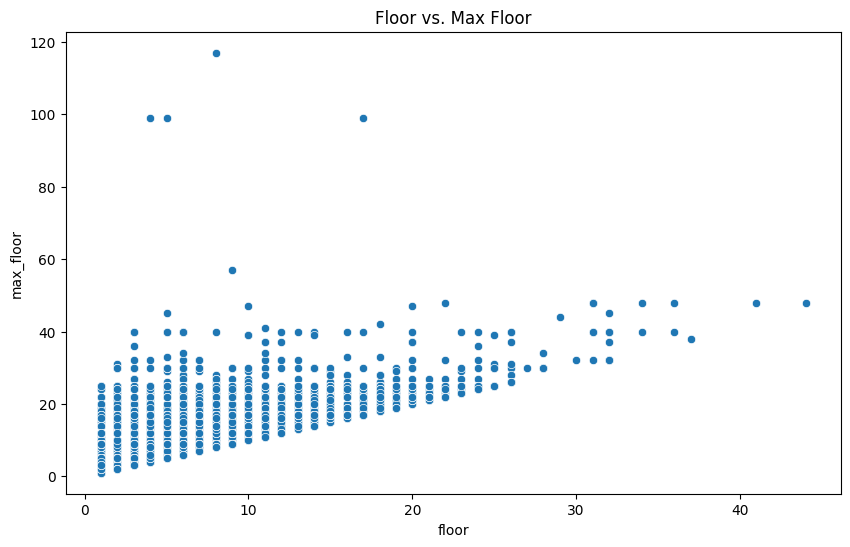

In [152]:
# floor againt max_floor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor', y='max_floor', data=dtrain)
plt.title('Floor vs. Max Floor')
plt.show()


<div dir="rtl">
פלוט-אפשר לראות קשר לינארי אך קשה יותר בגלל האוטליירם
</div>

<AxesSubplot:>

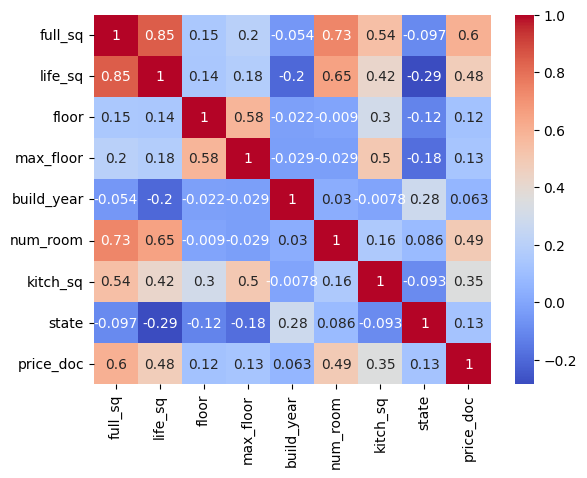

In [153]:
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']

corr = dtrain[internal_chars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


עשינו עוד פעם את אותם קורלציות לראות אם השינויים שעשינו באמת השפיעו על הדברים
ראינו שאכן השינוים שעשינו שיפרו את הקורלציות והסקנו מפה דברים חשובים

In [154]:
#בדיקה האם יש שוני בין החציון של המחירים לפי סוג הנכס
dtrain.groupby('product_type')['price_doc'].median()

product_type
Investment       6670000.0
OwnerOccupier    5564090.0
Name: price_doc, dtype: float64

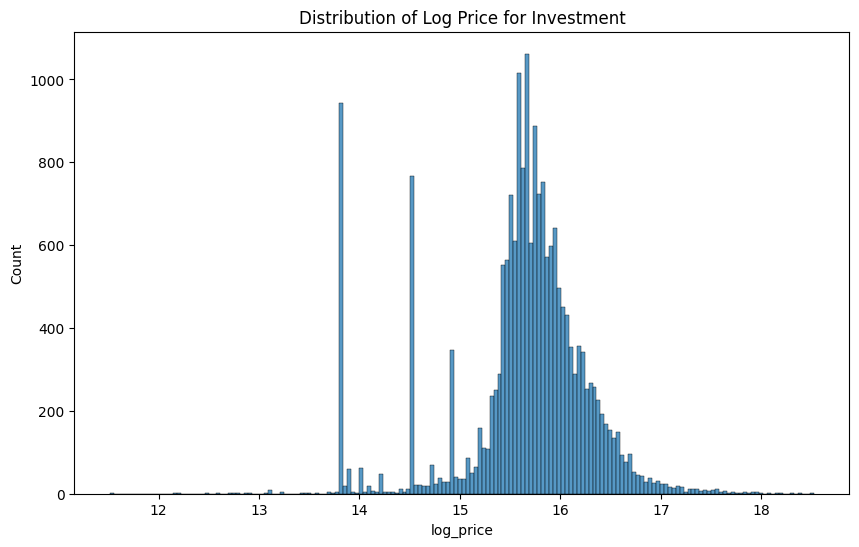

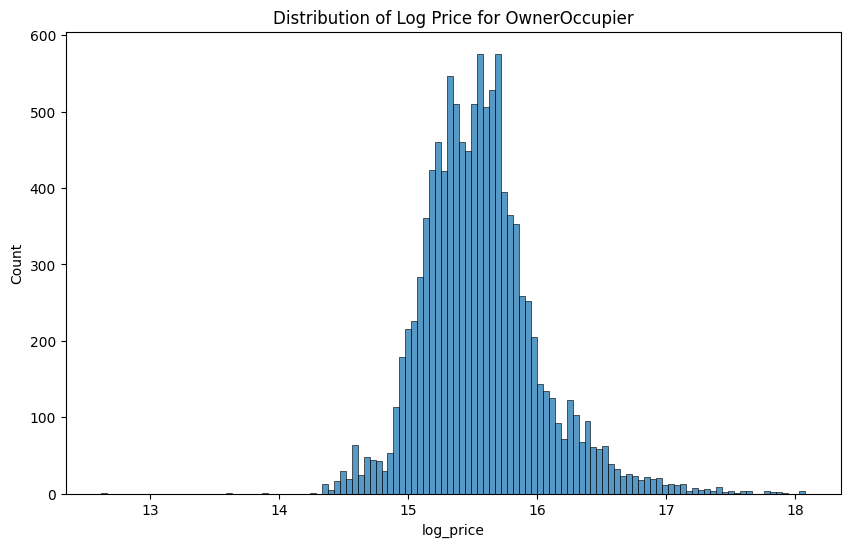

In [155]:
# Create a new column 'log_price'
dtrain['log_price'] = np.log(dtrain['price_doc'])

# Get unique product types
product_types = dtrain['product_type'].unique()

# Create a separate histogram for each product type
for product_type in product_types:
    plt.figure(figsize=(10,6))
    sns.histplot(data=dtrain[dtrain['product_type'] == product_type], x='log_price')
    plt.title(f'Distribution of Log Price for {product_type}')
    plt.show()

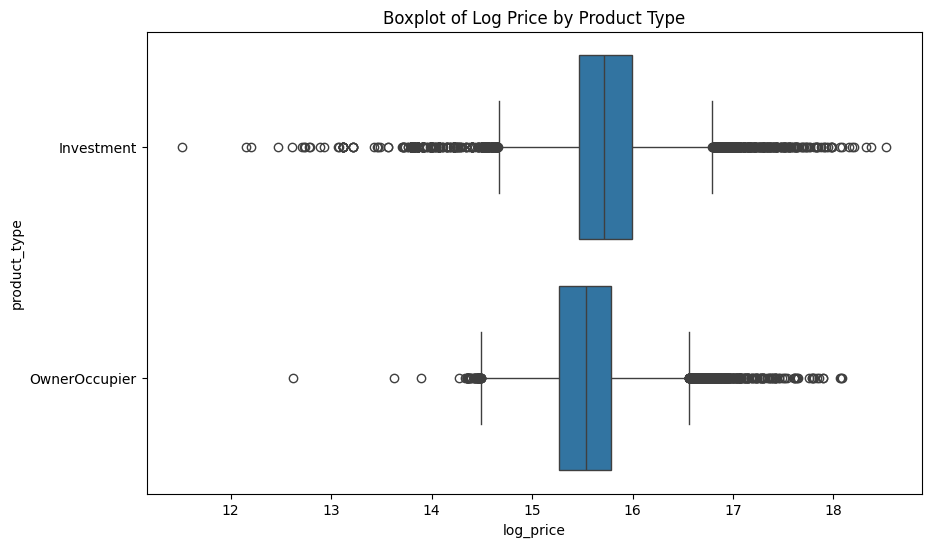

In [156]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dtrain, x='log_price', y='product_type')
plt.title('Boxplot of Log Price by Product Type')
plt.show()

dtrain = dtrain.drop('log_price', axis=1)

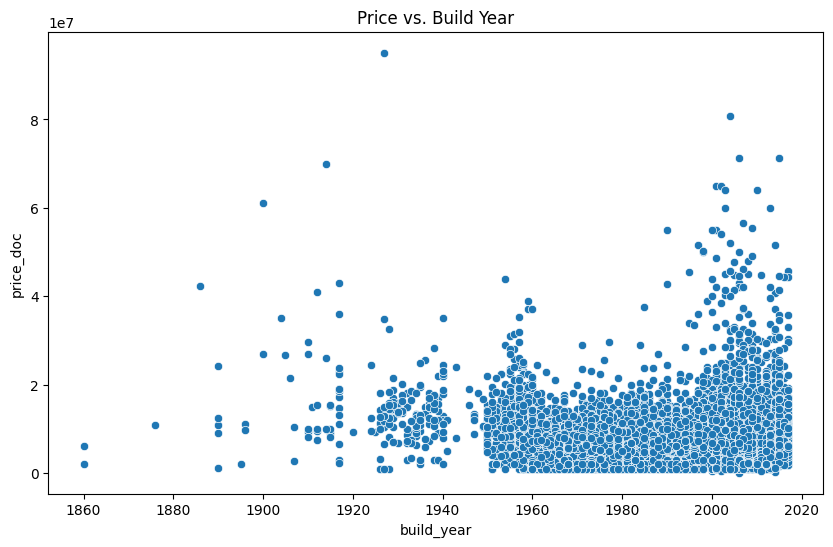

In [157]:
#build year against price_doc
#without the prbolemic years
plt.figure(figsize=(10, 6))
sns.scatterplot(x='build_year', y='price_doc', data=dtrain[(dtrain['build_year'] > 1691) & (dtrain['build_year'] < 2018)])
plt.title('Price vs. Build Year')
plt.show()

In [158]:
# List of problematic years
invalid_years = [0, 1, 3, 20, 71, 215, 2018, 4965]

# החלפתם לNA
for year in invalid_years:
    dtrain.loc[dtrain['build_year'] == year, 'build_year'] = np.nan

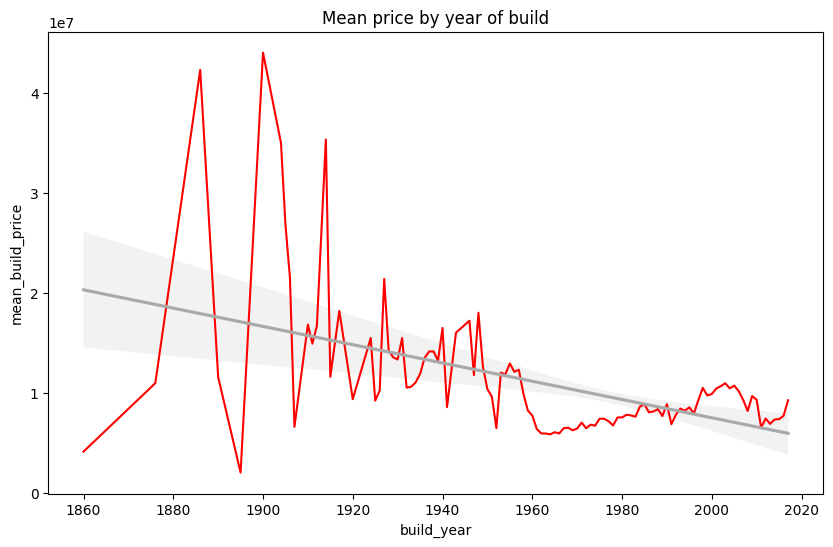

In [159]:
# Filter rows where build_year is between 1691 and 2018
filtered_dtrain = dtrain[(dtrain['build_year'] > 1691) & (dtrain['build_year'] < 2018)]

# Group by build_year and calculate mean price
grouped_dtrain = filtered_dtrain.groupby('build_year')['price_doc'].mean().reset_index()
grouped_dtrain.columns = ['build_year', 'mean_build_price']

# Plot mean price by year of build
plt.figure(figsize=(10, 6))
sns.lineplot(x='build_year', y='mean_build_price', data=grouped_dtrain, color='red')
sns.regplot(x='build_year', y='mean_build_price', data=grouped_dtrain, scatter=False, color='darkgrey')
plt.title('Mean price by year of build')
plt.show()

<div dir="rtl">
ניסנו לראות את הממוצע של המכירות לפי שנת בניית הבית אך לא הצלחנו להסיק יותר מידי מהגרף
לא נורא ממשיכים האלה!
</div>

Home State/Material

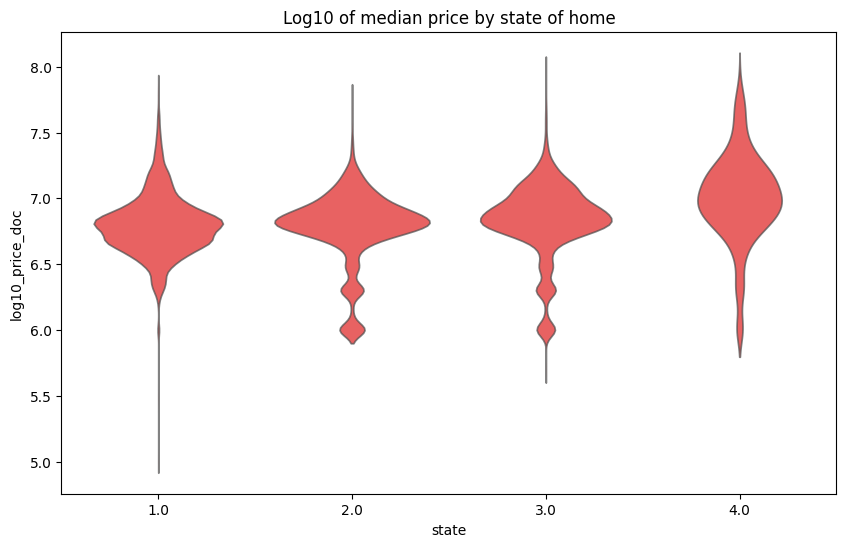

In [160]:
# Filter rows where state is not NaN
filtered_dtrain = dtrain[~dtrain['state'].isna()].copy()

# Create a new column for log10 of price_doc
filtered_dtrain['log10_price_doc'] = np.log10(filtered_dtrain['price_doc'])

# Plot log10 of price_doc by state
plt.figure(figsize=(10, 6))
sns.violinplot(x='state', y='log10_price_doc', data=filtered_dtrain, inner=None, color='red', alpha=0.7)
plt.title('Log10 of median price by state of home')
plt.show()

<div dir="rtl">
השימוש בלוג היה בשביל לראות את הגרף יותר טוב
אפשר לראות שאין הבדלים בין האזורים חוץ מאזור 4 שהמחיר בממוצע גבוה מהשאר
</div>

In [161]:
#לראות בעין את ההבדל
dtrain.groupby('state')['price_doc'].median()

state
1.0     6156040.0
2.0     6650000.0
3.0     7250000.0
4.0    10050000.0
Name: price_doc, dtype: float64

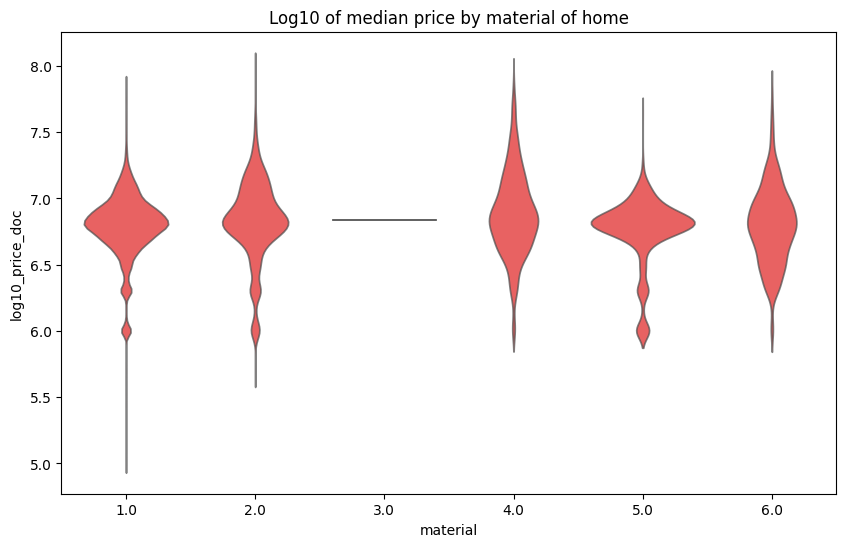

In [162]:
# Filter rows where state is not NaN
filtered_dtrain = dtrain[~dtrain['material'].isna()].copy()

# Create a new column for log10 of price_doc
filtered_dtrain['log10_price_doc'] = np.log10(filtered_dtrain['price_doc'])

# Plot log10 of price_doc by state
plt.figure(figsize=(10, 6))
sns.violinplot(x='material', y='log10_price_doc', data=filtered_dtrain, inner=None, color='red', alpha=0.7)
plt.title('Log10 of median price by material of home')
plt.show()

<div dir="rtl">
עשינו את האותו דבר גם לחומרים, אפשר לראות שבחומר השלישי אין יותר מידי תצפיות אך למרות זאת החלטנו לא לשייך אותו לשום דבר אחר
</div>

In [163]:
#לראות בעין את ההבדל
dtrain.groupby('material')['price_doc'].median()

material
1.0    6500000.0
2.0    6900000.0
3.0    6931143.0
4.0    7247869.5
5.0    6492000.0
6.0    6362318.0
Name: price_doc, dtype: float64

Demographic Characteristics

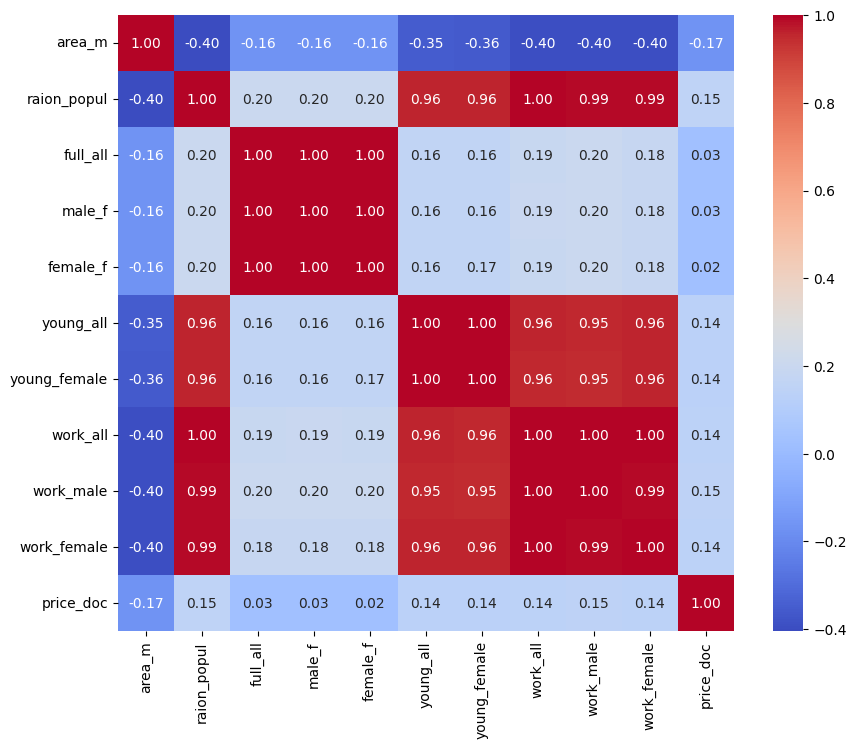

In [164]:
#בדיקת קרולציה לפייצרים דמוגרפים
demo_vars = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 
             'young_female', 'work_all', 'work_male', 'work_female', 'price_doc']

# Calculate correlation matrix
corr_matrix = dtrain[demo_vars].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

<div dir="rtl">
 כאן רואים שלפייצרים הדמוגרפים אין קורלציה גבוהה עם המחיר, אך יש קורלציה גבוהה בין מספר משתנים לבין עצמם דבר אשר נטפל בו בהמשך
 </div>

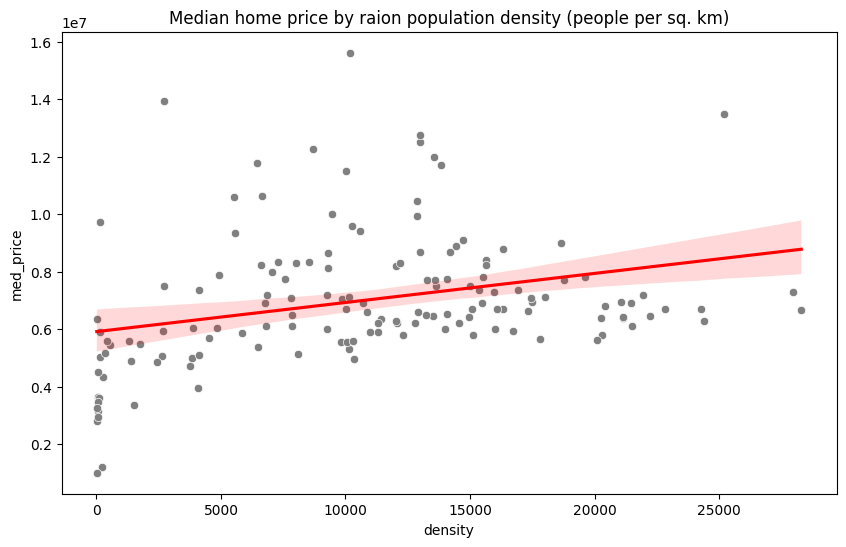

In [165]:
# חישוב של הצפיפות האוכלוסינית ואת המחיר החציוני לכל אזור, והצגה בגרף של המחיר החציוני לפי הצפיפות.
dtrain['area_km'] = dtrain['area_m'] / 1000000
dtrain['density'] = dtrain['raion_popul'] / dtrain['area_km']

# Group by sub_area and calculate median density and price
grouped_dtrain = dtrain.groupby('sub_area').agg({'density': 'median', 'price_doc': 'median'}).reset_index()
grouped_dtrain.columns = ['sub_area', 'density', 'med_price']

# Plot median price by density
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='med_price', data=grouped_dtrain, color='grey')
sns.regplot(x='density', y='med_price', data=grouped_dtrain, scatter=False, color='red')
plt.title('Median home price by raion population density (people per sq. km)')
plt.show()

<div dir="rtl">
אפשר לראות שכל שהאוזרים מאוכלסים יותר כך חציון המחיר עולה,אפשר לחשוב על זה שבאזורים מרחוקים ומבודדים המחיר נמוך יותר מאזור מרכזי
</div>

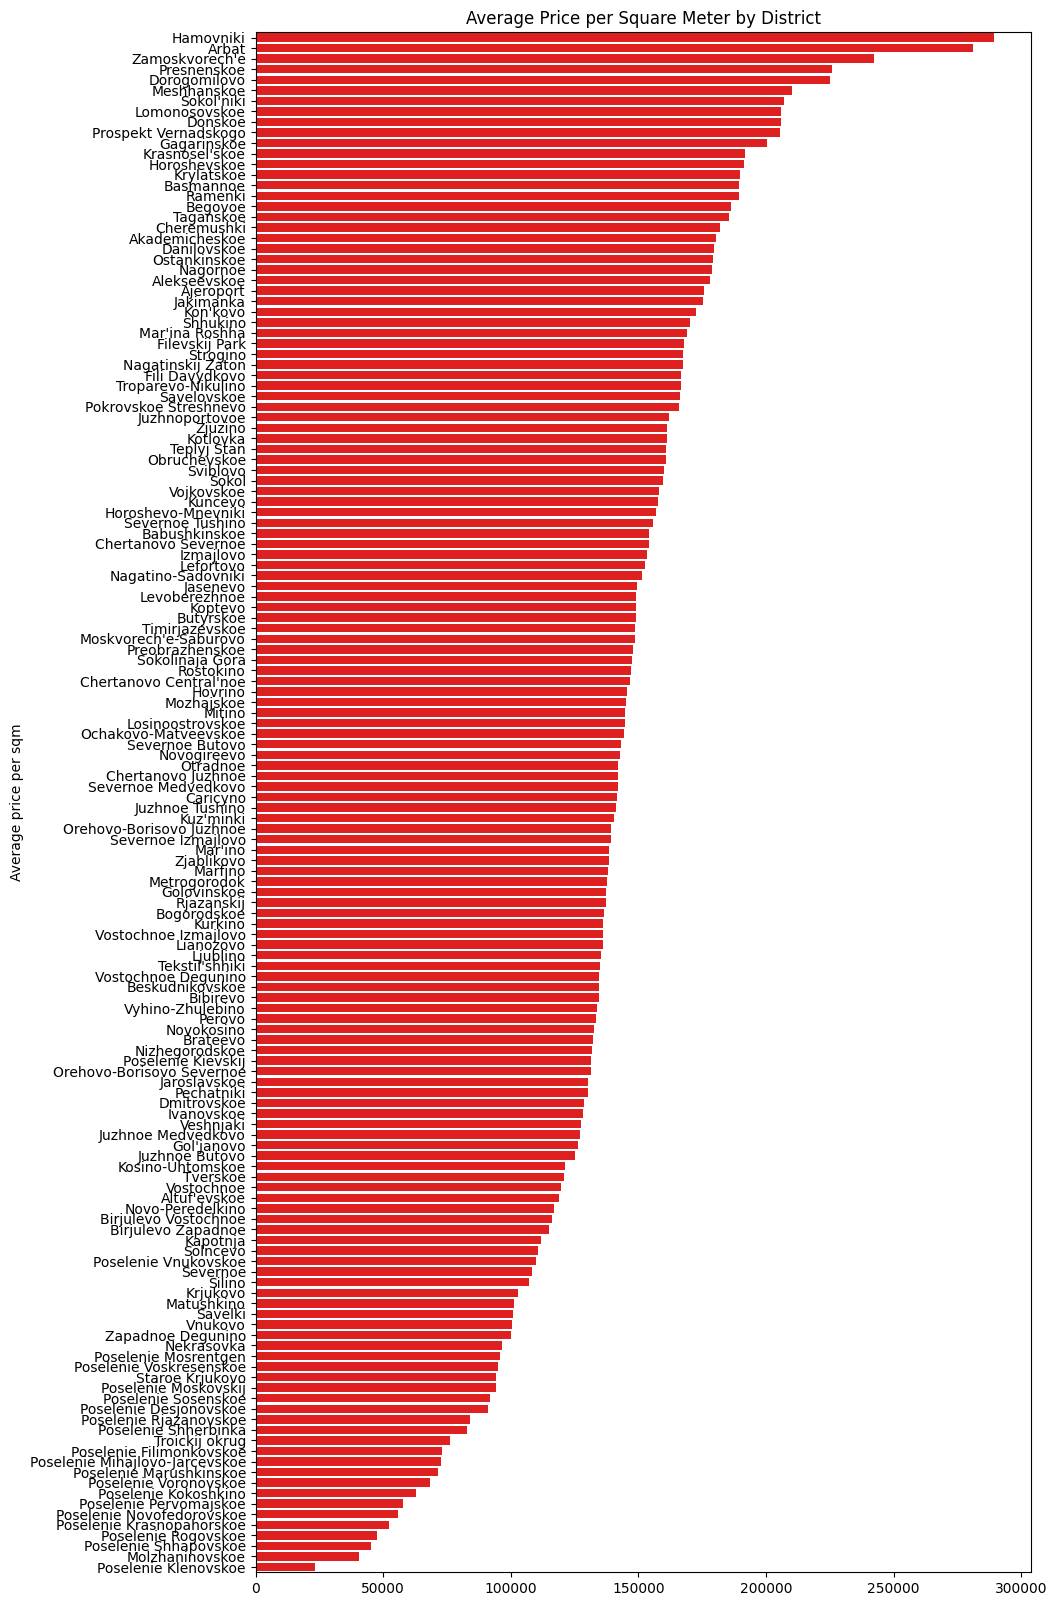

In [166]:
#בדיקת מחיר ממוצע למטר רבוע לפי אזור
grouped_dtrain_avg_price_per_sqm = dtrain.groupby('sub_area').agg({'price_doc': 'sum', 'full_sq': 'sum'}).reset_index()

# Calculate the average price per square meter for each sub_area
grouped_dtrain_avg_price_per_sqm['avg_price_per_sqm'] = grouped_dtrain_avg_price_per_sqm['price_doc'] / grouped_dtrain_avg_price_per_sqm['full_sq']

# Display the result
grouped_dtrain_avg_price_per_sqm[['sub_area', 'avg_price_per_sqm']]

# plot
grouped_dtrain_avg_price_per_sqm = grouped_dtrain_avg_price_per_sqm.sort_values('avg_price_per_sqm', ascending=False)
plt.figure(figsize=(10, 20))
sns.barplot(x='avg_price_per_sqm', y='sub_area', data=grouped_dtrain_avg_price_per_sqm, color='r')
plt.xlabel('')
plt.ylabel('Average price per sqm')
plt.title('Average Price per Square Meter by District')
plt.show()

In [167]:
dtrain = dtrain.drop(['young_female','work_female','work_male','male_f','female_f'],axis =1)

School Characteristics


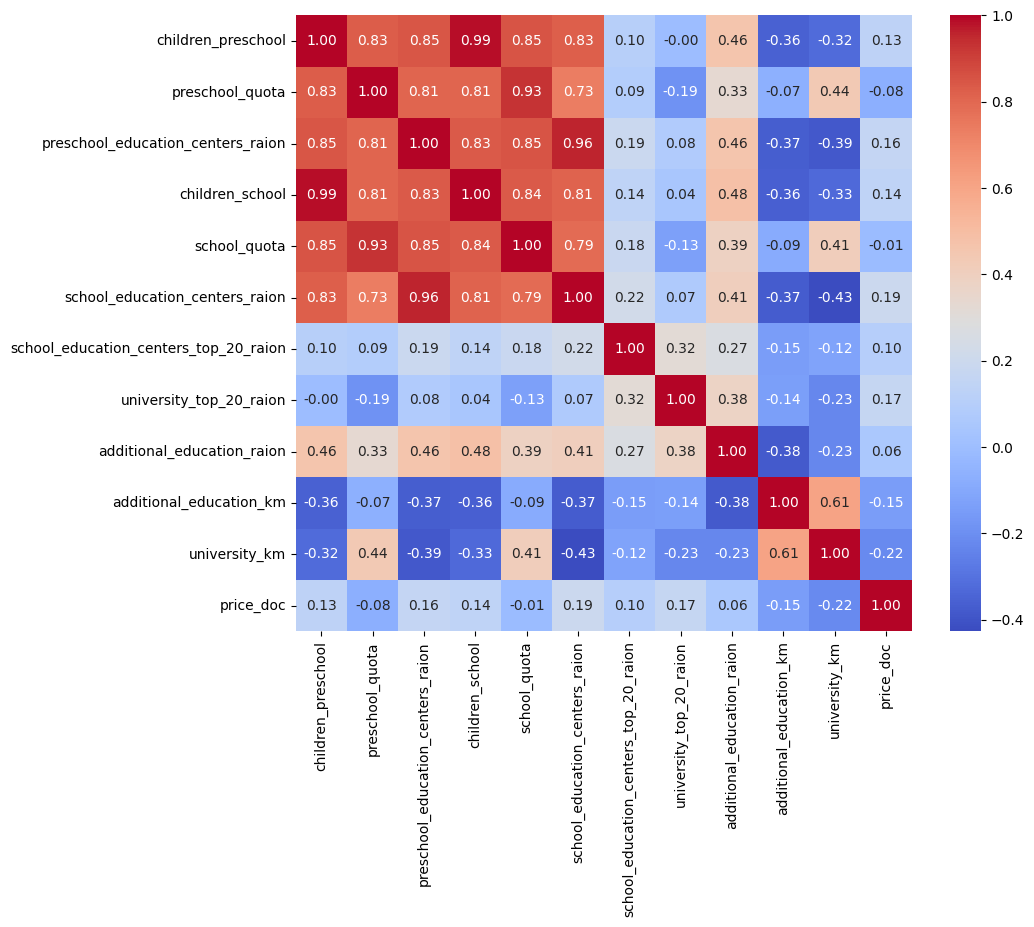

In [168]:
# בדיקת קורלציה לפי מאפייני חינוך
school_chars = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion',
                'children_school', 'school_quota', 'school_education_centers_raion', 
                'school_education_centers_top_20_raion', 'university_top_20_raion',
                'additional_education_raion', 'additional_education_km', 'university_km',
                'price_doc']

# Calculate correlation matrix
corr_matrix = dtrain[school_chars].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [169]:
dtrain = dtrain.drop(['preschool_education_centers_raion','children_preschool'], axis=1, errors='ignore')

<div dir="rtl">
אפשר לראות שאין קורלציה גבוהה בין המחיר לבין הפייצרים של החינוך,אך עדיין יש קורלציות גבוהות בין פייצרים לעצמם אשר נתייחס אליהם אחרי כך
</div>

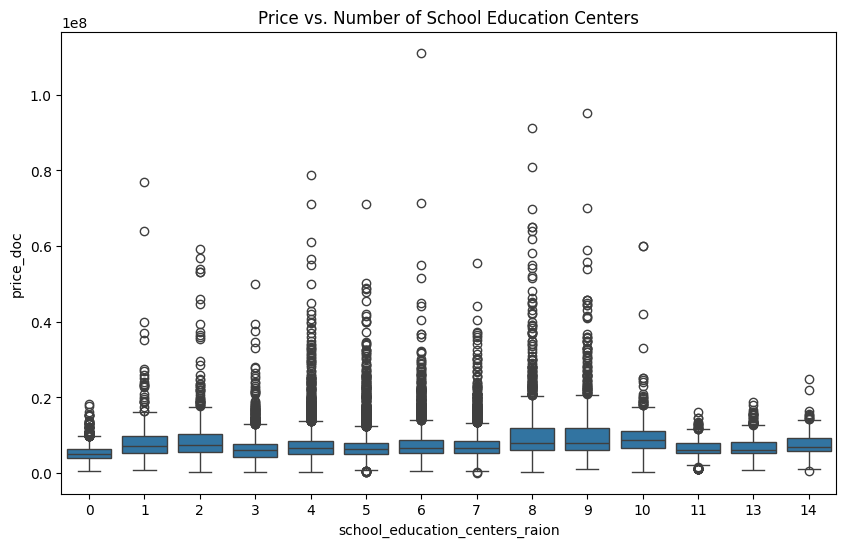

In [170]:
# school_education_centers against price_doc
plt.figure(figsize=(10, 6))
sns.boxplot(x='school_education_centers_raion', y='price_doc', data=dtrain)
plt.title('Price vs. Number of School Education Centers')
plt.show()

Cultural/Recreational Characteristics


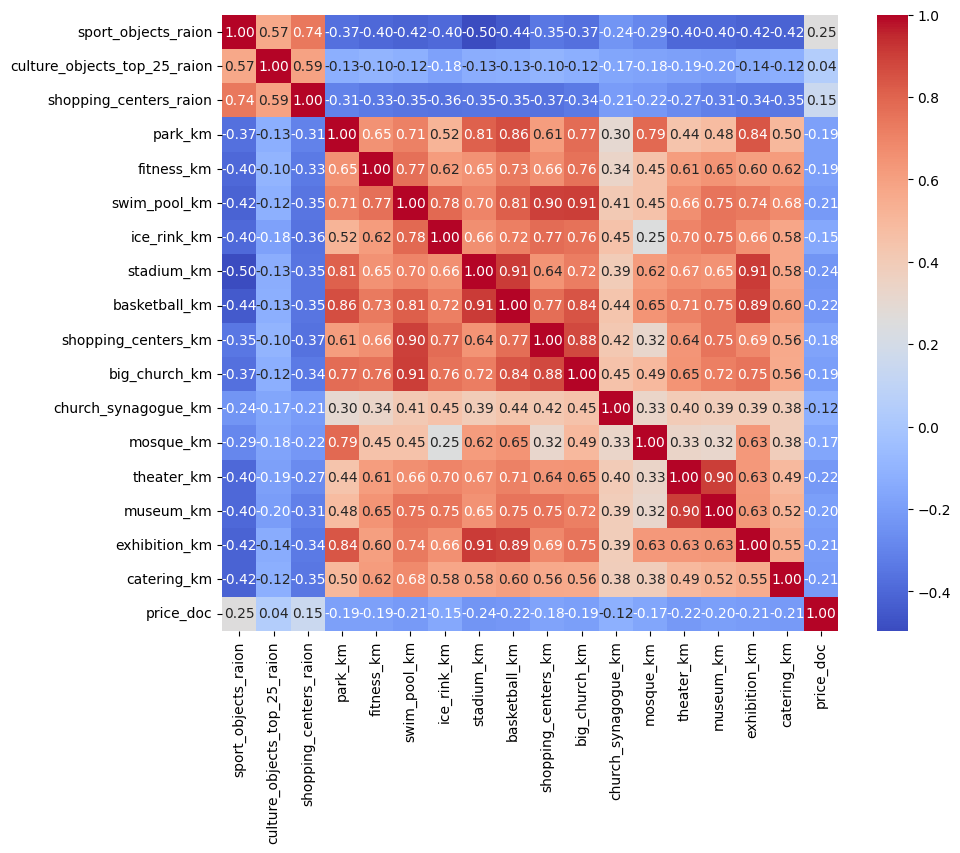

In [171]:
#בדיקת קורלציה בין הפייצרים של התרבות והספורט
cult_chars = ['sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 
              'park_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km','stadium_km', 'basketball_km', 
              'shopping_centers_km', 'big_church_km','church_synagogue_km', 'mosque_km', 'theater_km', 
              'museum_km', 'exhibition_km', 'catering_km', 'price_doc']

# Calculate correlation matrix
corr_matrix = dtrain[cult_chars].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

<div dir="rtl">
ראינו שיש קורלציה אחת יחסית גבוהה בין מתקני הספורט לבין המחיר אז החלטנו לבדוק זאת,בנוסף אפשר שיש קשר שלילי בין מרחק של הבית מדברים תרבותים.
</div>

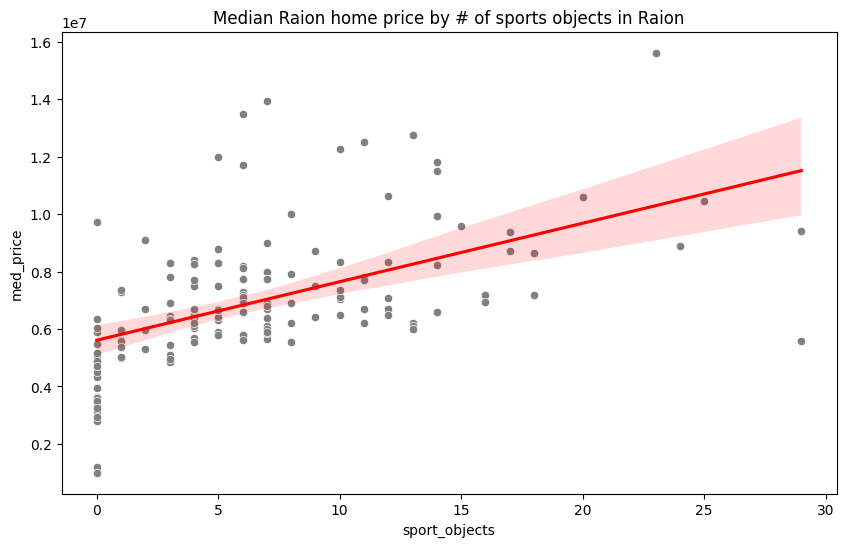

In [172]:
# חישוב הממוצע לפי מספר המתקנים הספורטיבים ואת המחיר החציוני לכל אזור
grouped_dtrain = dtrain.groupby('sub_area').agg({'sport_objects_raion': 'mean', 'price_doc': 'median'}).reset_index()
grouped_dtrain.columns = ['sub_area', 'sport_objects', 'med_price']

# Plot median price by sport_objects
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sport_objects', y='med_price', data=grouped_dtrain, color='grey')
sns.regplot(x='sport_objects', y='med_price', data=grouped_dtrain, scatter=False, color='red')
plt.title('Median Raion home price by # of sports objects in Raion')
plt.show()

<div dir="rtl">
אפשר לראות קשר לינארי חיובי, דבר אשר יכול לשמש אותנו בעתיד ולהבין שזה משתנה חשוב למחיר
</div>

Infrastructure Features


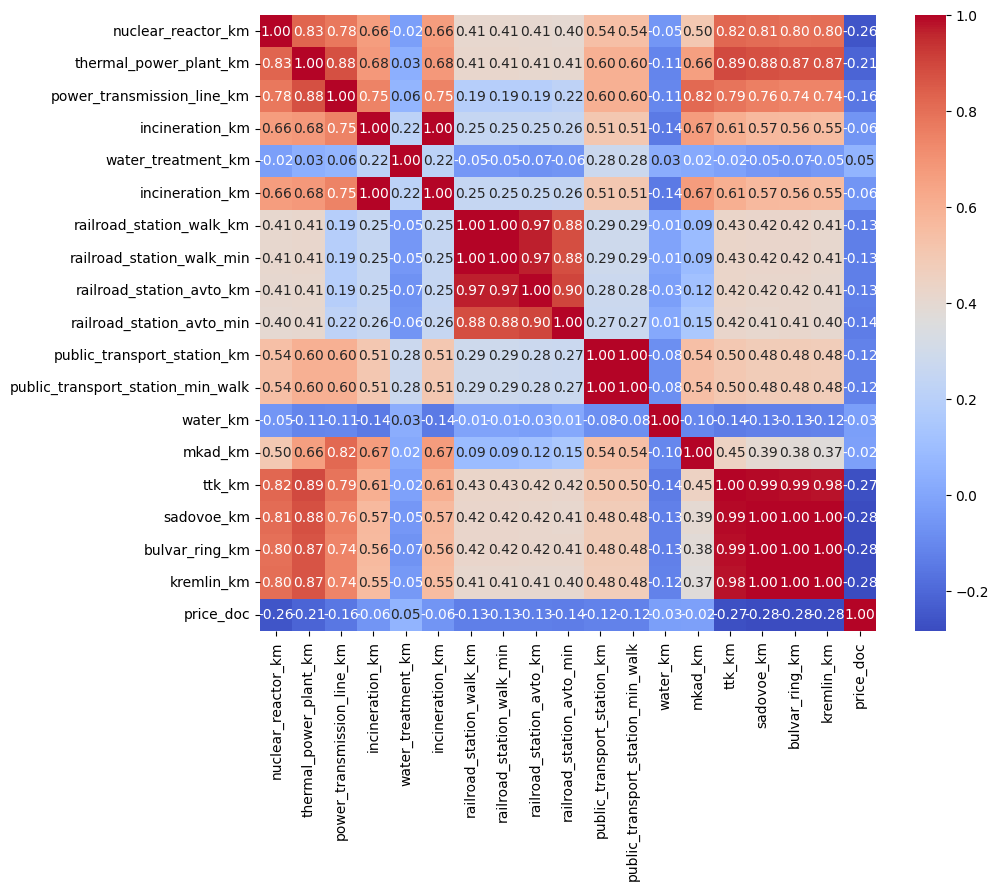

In [173]:
#בדיקת קרולציה לפייצרים מפעליים
inf_features = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km',
                'incineration_km','water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 
                'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min', 
                'public_transport_station_km', 'public_transport_station_min_walk', 'water_km', 
                'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km', 'kremlin_km', 'price_doc']

# Calculate correlation matrix
corr_matrix = dtrain[inf_features].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [174]:
dtrain = dtrain.drop(['ttk_km', 'sadovoe_km','bulvar_ring_km'], axis=1, errors='ignore')

<div dir="rtl">
כאן אפשר לראות רק קורלציות חלשות בין המחיר לבין הפייצרים, אך אפשר לראות גם קורלציות מושלמות בין הפיצרים לבין עצמם.כאן אפשר לראות רק קורלציות חלשות בין המחיר לבין הפייצרים, אך אפשר לראות גם קורלציות מושלמות בין הפיצרים לבין עצמם.
</div>

<div dir="rtl">
עד לכאן עשינו את החלק של חקירת הדאטה
בעצם בחלק זה חיפשנו קורלציות בין המחיר לבין קטוגריות מסויומת של פיצרים, עשינו זאת כדי להתמודד בהמשך עם הדאטה וגם לקחנו תובנות, דרכי פעולה עתידיות ואפילו קצת "סידרנו" את הדאטה. ועכשיו אחרי כל זה אנחנו מוכנים להתחיל ולעבוד ממש על דאטה לנקות אותה לסדר אותה ולהבין מה המשתנים החשובים שיתנו לנו את המודל האופטימילי.יוצאים לדרך!
</div>

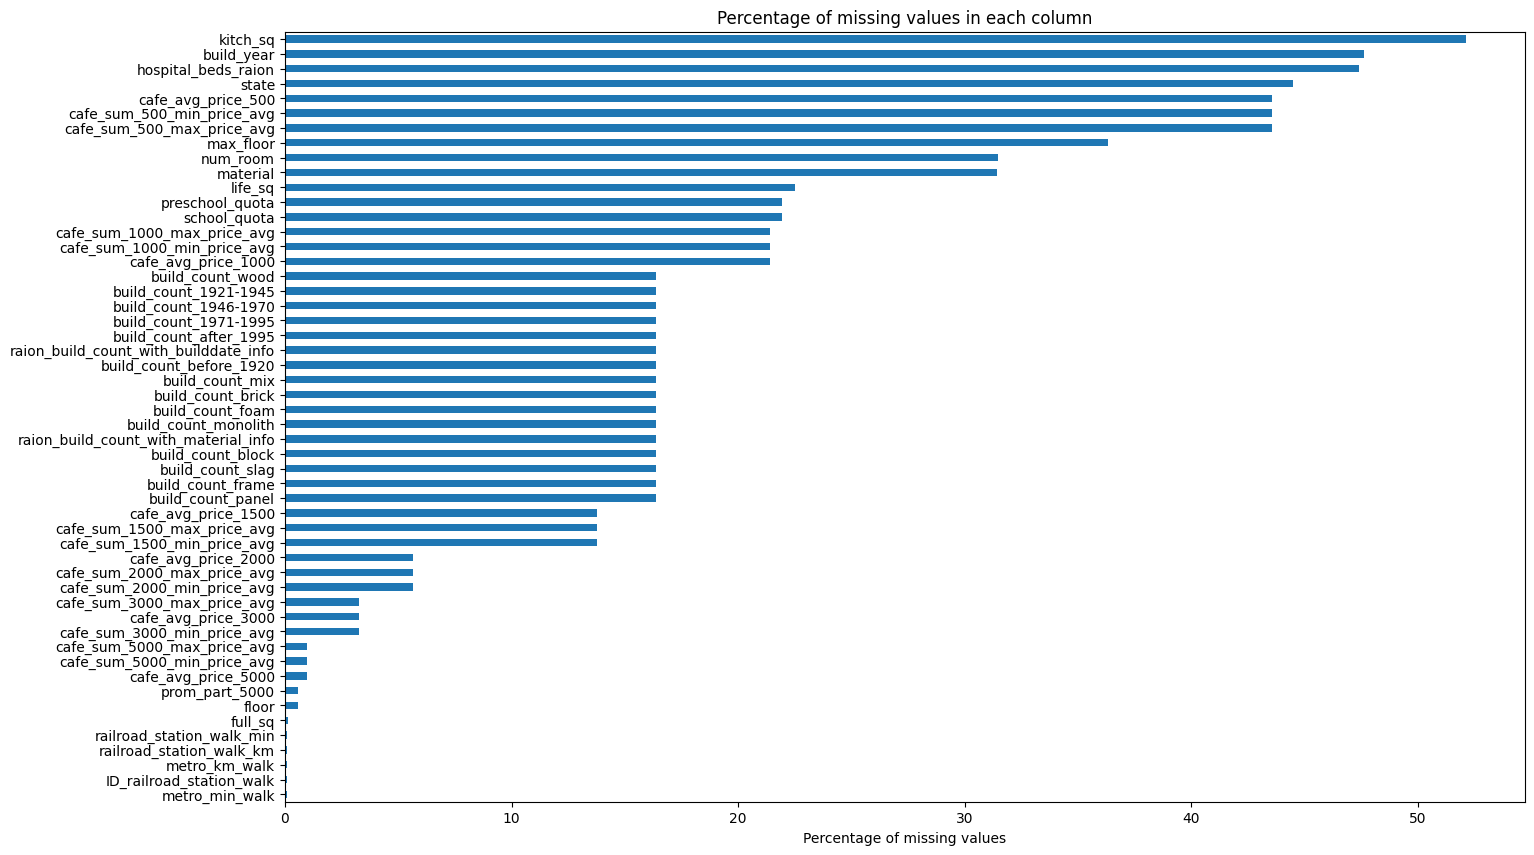

In [175]:
#חישבנו את האחוזים של כמות הערכים החסרים בפיצ'רים בדאטה כדי לראות האם יש קורלציות גבוהות בין המשנתים או בין המשתנים למשתני המטרה 
#ולבדוק האם יש מה לעבוד איתם או אפשר למחוק אותם
missing_values_percent = dtrain.isnull().mean() * 100

missing_values_percent_filtered = missing_values_percent[missing_values_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(16, 10))
missing_values_percent_filtered.sort_values().plot(kind='barh')
plt.xlabel('Percentage of missing values')
plt.title('Percentage of missing values in each column')
plt.show()

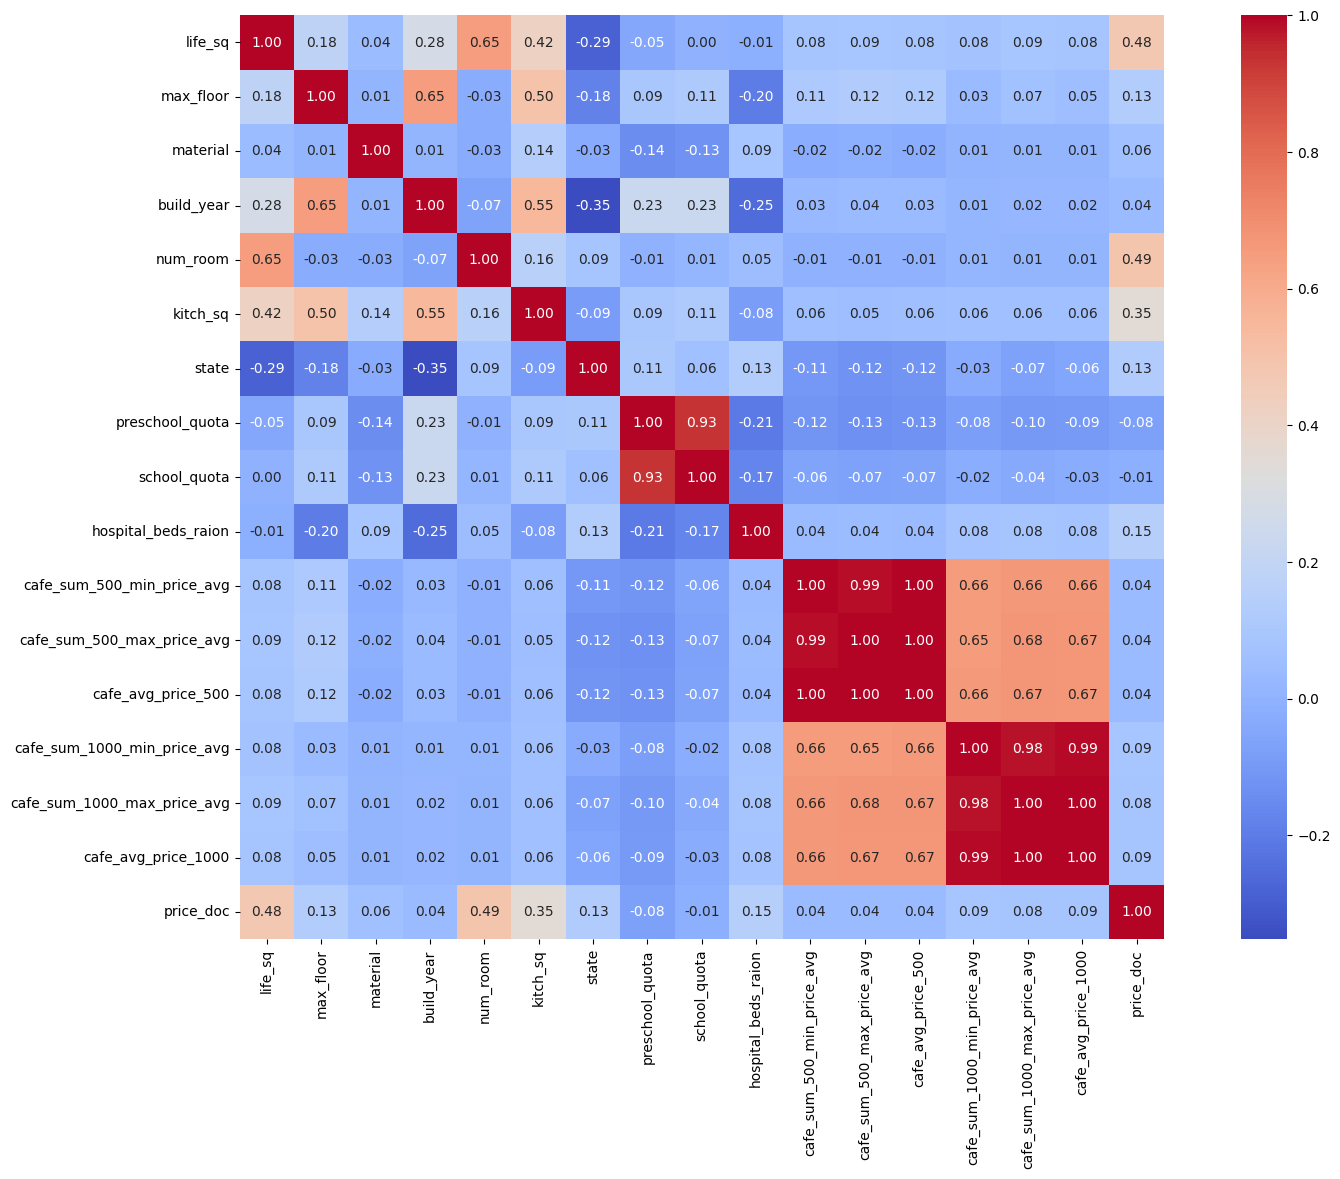

In [176]:
#חישבנו את האחוזים של כמות הערכים החסרים בפיצ'רים בדאטה כדי לראות האם יש קורלציות גבוהות בין המשנתים או בין המשתנים למשתני המטרה 
#ולבדוק האם יש מה לעבוד איתם או אפשר למחוק אותם
high_missing_features= missing_values_percent[(missing_values_percent >= 20)].index

features = list(high_missing_features) + ['price_doc']

corr_matrix = dtrain[features].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [177]:
# הורדת הפיצ'רים בעלי קורלוציה גבוהה אחד לשני
dtrain = dtrain.drop(['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_sum_1000_min_price_avg','cafe_sum_1000_max_price_avg','school_quota'], axis=1, errors='ignore')

In [178]:
# החלפת משתנים קטגוריאלים באורדינלים (יעשה 0 או 1 במשתנים של כן או לא ואחרים לפי סדר ממשי)
label_enc = LabelEncoder()
for col in categorical_columns:
    if col != 'timestamp' and col != 'sub_area':
        dtrain[col] = label_enc.fit_transform(dtrain[col].astype(str))

In [179]:
#התמקדנו ספציפית במשתנה שמייצג את השכונות מכיוון שהוא אינו מראה על סדר מסויים. החלפנו את הערכים בפיצ'ר זה בממוצע של אותו איזור

# Create a target encoder with smoothing
target_enc = ce.TargetEncoder(cols=['sub_area'], smoothing=10.0)

# Fit and transform the 'sub_area' column
dtrain['sub_area'] = target_enc.fit_transform(dtrain['sub_area'], dtrain['price_doc'])

dtrain[categorical_columns]

timestamp  product_type      sub_area  culture_objects_top_25  \
0      2011-08-20             0  6.670177e+06                       0   
1      2011-08-23             0  8.392539e+06                       1   
2      2011-08-27             0  6.605066e+06                       0   
3      2011-09-01             0  8.809623e+06                       0   
4      2011-09-05             0  1.158589e+07                       0   
...           ...           ...           ...                     ...   
30466  2015-06-30             0  7.127992e+06                       0   
30467  2015-06-30             0  7.109681e+06                       1   
30468  2015-06-30             1  6.215746e+06                       0   
30469  2015-06-30             0  1.385088e+07                       0   
30470  2015-06-30             0  6.168624e+06                       0   

       thermal_power_plant_raion  incineration_raion  oil_chemistry_raion  \
0                              0                   0                    0   
1                              0                   0                    0   
2                              0                   0                    0   
3                              0                   0                    0   
4                              0                   0                    0   
...                          ...                 ...                  ...   
30466                          0                   1                    0   
30467                          0                   0                    0   
30468                          0                   0                    0   
30469                          0                   0                    0   
30470                          0                   0                    0   

       radiation_raion  railroad_terminal_raion  big_market_raion  \
0                    0                        0                 0   
1                    0                        0                 0   
2                    1                        0                 0   
3                    0                        0                 0   
4                    1                        1                 0   
...                ...                      ...               ...   
30466                1                        0                 0   
30467                1                        1                 0   
30468                0                        0                 0   
30469                1                        0                 0   
30470                1                        0                 0   

       nuclear_reactor_raion  detention_facility_raion  water_1line  \
0                          0                         0            0   
1                          0                         0            0   
2                          0                         0            0   
3                          0                         0            0   
4                          0                         0            0   
...                      ...                       ...          ...   
30466                      0                         0            0   
30467                      0                         1            0   
30468                      0                         0            0   
30469                      0                         0            0   
30470                      0                         0            0   

       big_road1_1line  railroad_1line  ecology  
0                    0               0        1  
1                    0               0        0  
2                    0               0        3  
3                    0               0        1  
4                    0               1        0  
...                ...             ...      ...  
30466                0               0        1  
30467                0               0        3  
30468                0               0        2  
30469                0  

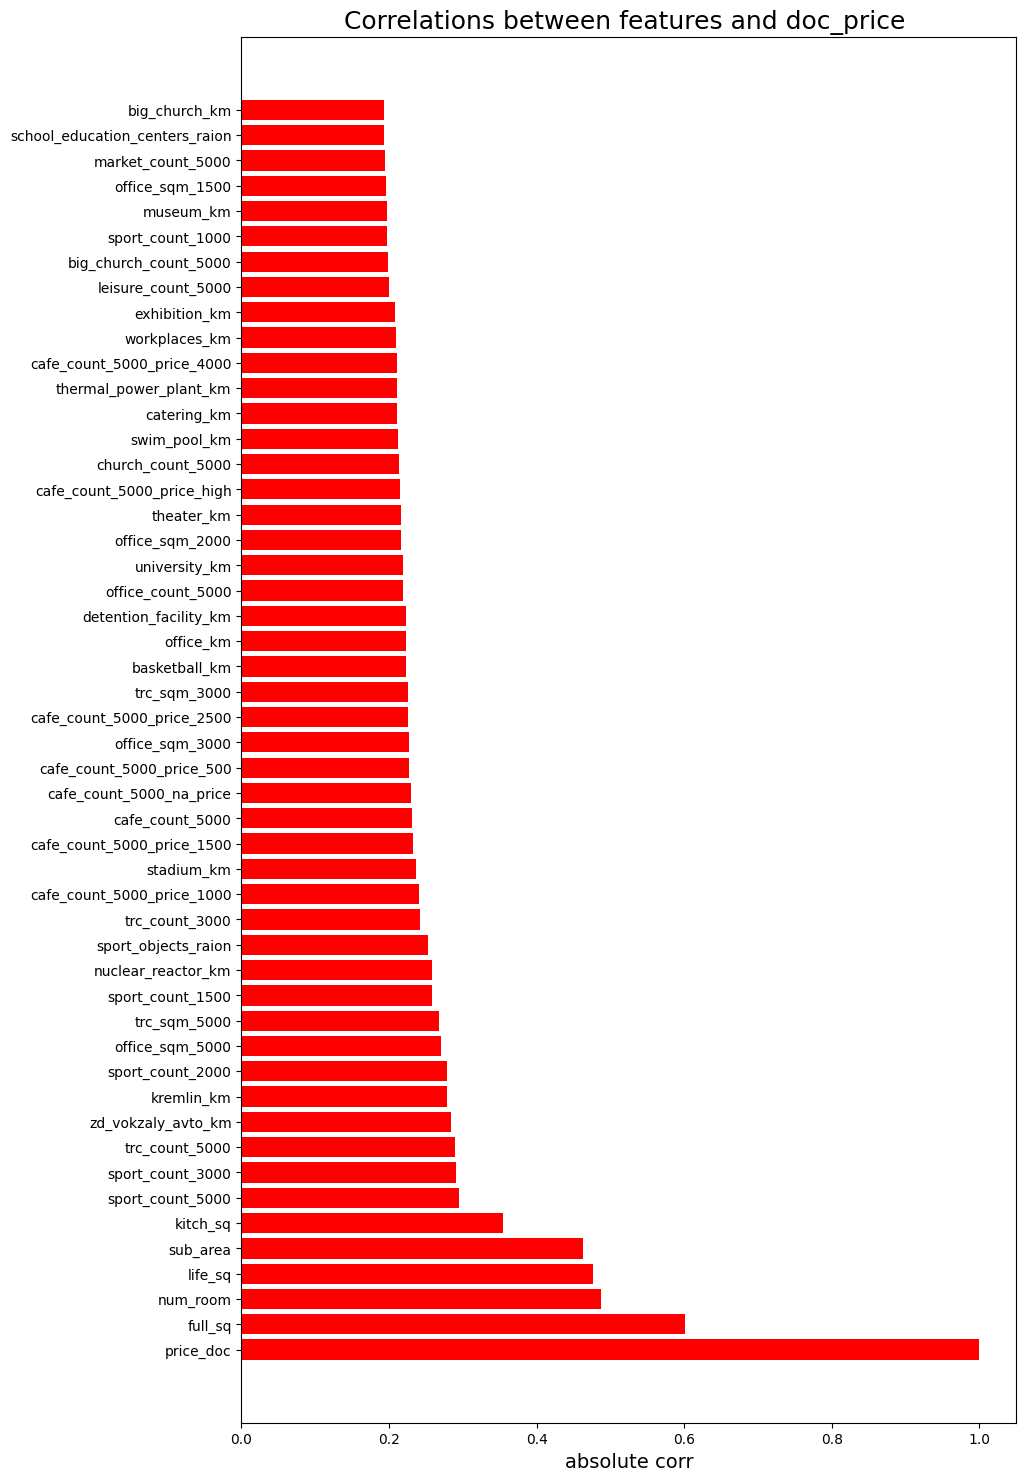

In [180]:
#כאן בדקנו את 50 הפיצ'רים עם הקורלוציה הכי גבוהה עם משתנה המטרה כדי לבדוק אחר כך האם משתנים אלה יוכלו לעזור להוריד את סיבוכיות המודל
corrmat = dtrain.drop(["id", "timestamp"], axis=1).corr(method='pearson', min_periods=1000)
corrmat = np.abs(corrmat)
remain_num = 50
corr_target = corrmat['price_doc'].reset_index()[:-2]
corr_target.columns = ['feature','abs_corr']
corr_target = corr_target.sort_values(by = 'abs_corr', ascending = False)[:remain_num].loc[corr_target['abs_corr'] >0.01]
ind = np.arange(corr_target.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, corr_target.abs_corr.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_target.feature.values, rotation='horizontal')
ax.set_xlabel("absolute corr", fontsize = 14)
ax.set_title("Correlations between features and doc_price ", fontsize = 18)
plt.show()



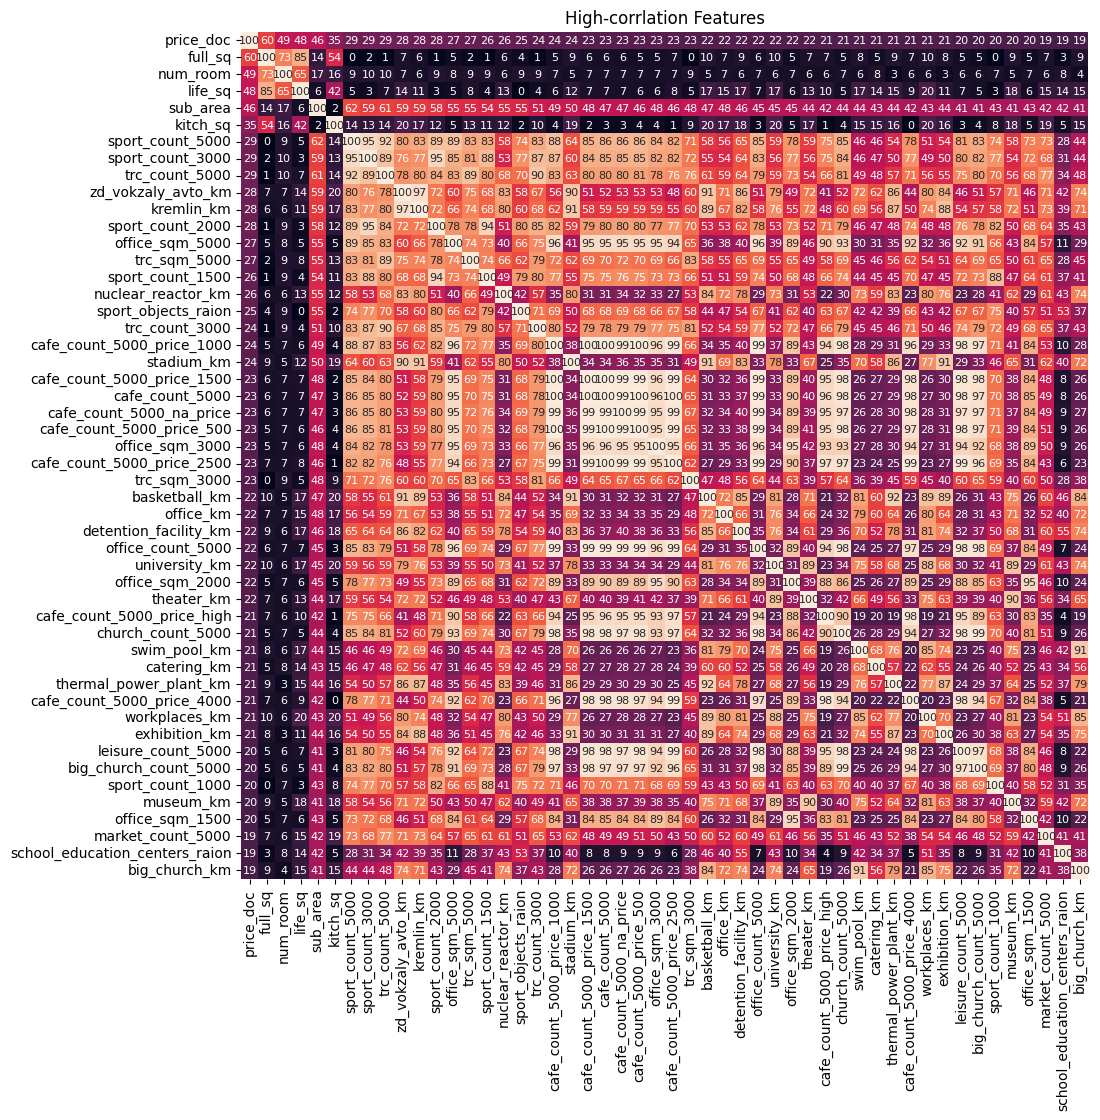

In [181]:
#בדיקה האם מתוך פיצ'רים אלה ישנם כאלה בעלי קורולוציה גבוהה אחד עם השני
corr_target_f = list(corr_target.feature.values)
corr_target_f2 = corr_target_f
high_corr = dtrain[corr_target_f2].corr(method='pearson', min_periods=1000)
high_corr = np.abs(high_corr)*100
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(high_corr, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
plt.show()

In [182]:
dtrain = dtrain.drop('id',axis =1)

<div dir="rtl">
בקטע זה אנו מבצעים ריגרסיות מסוג RF
כדי לראות את ההשפעות במצב הראשוני לאחר הEDA,
לאחר מכאן בוצע בדיקה עם השלמת ערכים חסרים,
בנוסף בוצע גם מידול עם פייצרים חדשים אשר יצרנו,
ולסוף יצרנו שילוב של הפייצרים החשובים למודל בשילוב עם הפייצרים עם הקורלציה הגבוהה ביותר עם המשתנה מטרה
בודדנו כל רגריסיה עם שינוי קטן בשביל לבדוק האם בכלל לכל שינוי יש השפעה והאם כדאי להמשיך איתו קדימה ולשפר עוד יותר את המודל 

</div>

In [ ]:
#random forest-במצב הראשוני לאחר הEDA

# Define the features and target
X = dtrain.drop(['price_doc','timestamp'], axis=1)
y = dtrain['price_doc']

# Split the data into train and temporary sets (70% train, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest regressor
rf_regressor_withNA = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor_withNA.fit(X_train, y_train)

# Calculate MSE on validation set using 5-Fold Cross-Validation
cv_scores = cross_val_score(rf_regressor_withNA, X_val, y_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores)}")


In [ ]:
#מילוי ערכים חסרים ע"י ראנדום פורסט וחציון אימיפיוטר. עשינו זאת על דאטה פריים חדש כדי לבדוק האם זה באמת מועיל 

dtrain_noNA = dtrain.copy()
missing_values_percent = dtrain.isnull().mean() * 100
high_missing_features= missing_values_percent[(missing_values_percent >= 20)].index

imputer_rf = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), random_state=42, max_iter=10)

df_imputed_high = imputer_rf.fit_transform(dtrain_noNA[list(high_missing_features)])
df_imputed_high = pd.DataFrame(df_imputed_high, columns=list(high_missing_features))

low_missing_features = missing_values_percent[(missing_values_percent > 0)&(missing_values_percent < 20)].index
imputer_median = SimpleImputer(strategy='median')

df_imputed_low = imputer_median.fit_transform(dtrain_noNA[low_missing_features])
df_imputed_low = pd.DataFrame(df_imputed_low, columns=low_missing_features)

df_imputed = pd.concat([df_imputed_high, df_imputed_low], axis=1)
df_imputed = df_imputed.reindex(columns=dtrain_noNA.columns)

In [ ]:
#random forest - עם המניפלציות של NA
X1 = df_imputed.drop(['price_doc','timestamp'], axis=1)
y1 = dtrain['price_doc']

X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y1, test_size=0.3, random_state=42)

X1_val, X1_test, y1_val, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, random_state=42)

rf_regressor_noNA = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor_noNA.fit(X1_train, y1_train)

cv_scores = cross_val_score(rf_regressor_noNA, X1_val, y1_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores)}")

Cross-Validation RMSE scores: [3316554.58769802 2762481.56193022 2638919.57258903 2485264.92193019
 3038035.35284563]
Mean Cross-Validation RMSE: 2848251.1993986154


In [ ]:
#futre engenier-יצירת משתנים חדשים ובדיקתם עם הרגרסיה
# convert the timestamp to datetime
dtrain['dt'] = pd.to_datetime(dtrain['timestamp'].copy())
# נקודת ההתחלה של הזמן
reference_date = dtrain['dt'].min()

# ההפרש מנקודת ההתחלה
dtrain['day_count'] = (dtrain['dt'] - reference_date).dt.days

# Residential & kitchen area to total area ratio:
dtrain['resident_to_total_ratio'] = dtrain['life_sq']/dtrain['full_sq']
dtrain['kitchen_to_total_ratio'] = dtrain['kitch_sq']/dtrain['full_sq']

dtrain['avg_room_area'] = dtrain['life_sq']/dtrain['num_room']

dtrain['extra_area'] = dtrain['full_sq'] - dtrain['life_sq']

# floor & max_floor to 'floor_rel_total'
dtrain['floor_rel_total'] = dtrain['floor'] / dtrain['max_floor']

# Visualize median house prices over time:

new_features = ['day_count','resident_to_total_ratio','kitchen_to_total_ratio','avg_room_area','extra_area','floor_rel_total']

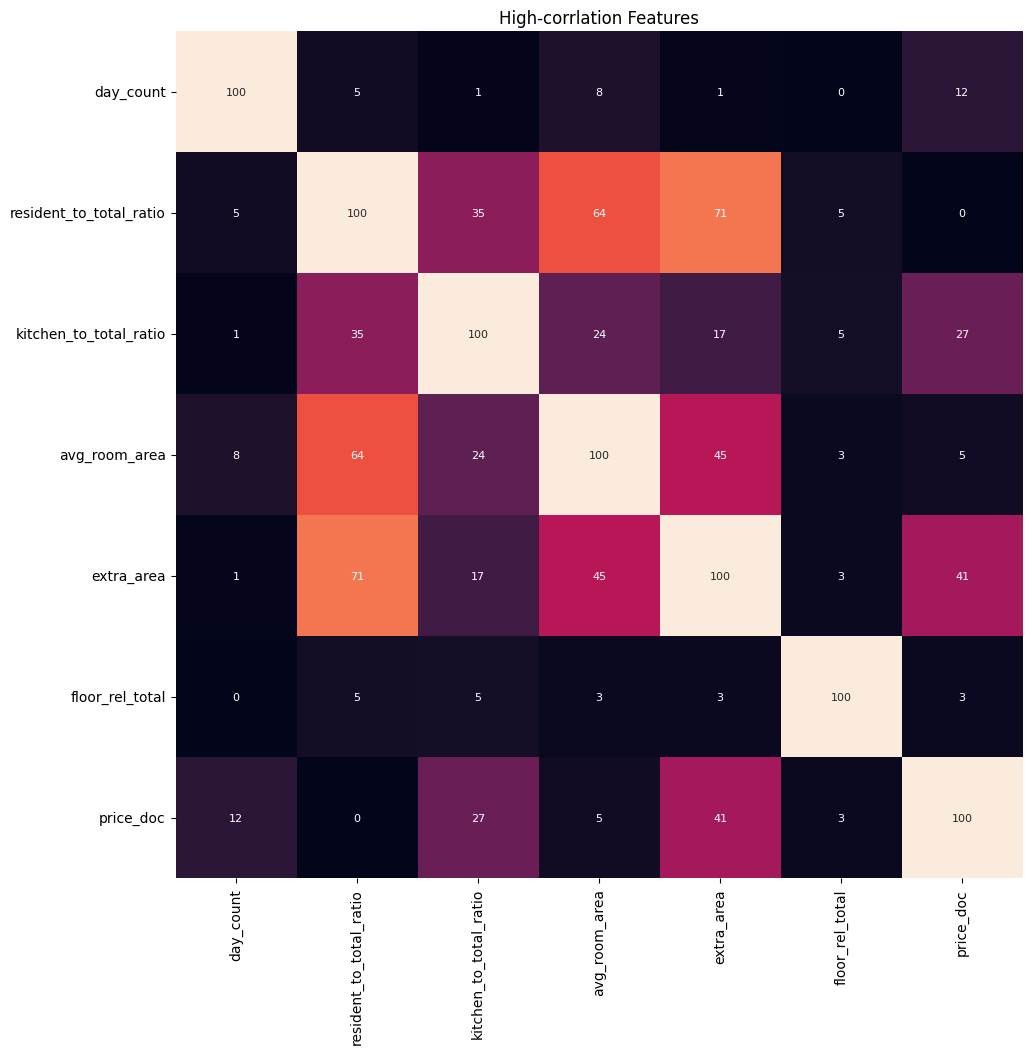

In [ ]:
new_features.append('price_doc')
new_features_corr = dtrain[new_features].corr(method='pearson', min_periods=1000)
new_features_corr = np.abs(new_features_corr)*100
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(new_features_corr, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
plt.show()

In [ ]:
#random forest - בדיקה עם המשתנים החדשים
X2 = dtrain.drop(['price_doc','timestamp','dt'], axis=1)
y2 = dtrain['price_doc']

X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=42)

rf_regressor_newfeatures = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor_newfeatures.fit(X2_train, y2_train)

cv_scores = cross_val_score(rf_regressor_newfeatures, X2_val, y2_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores)}")

Cross-Validation RMSE scores: [3325385.65392329 2770432.38321692 2620179.35362765 2296385.37064867
 3016506.81089989]
Mean Cross-Validation RMSE: 2805777.9144632835


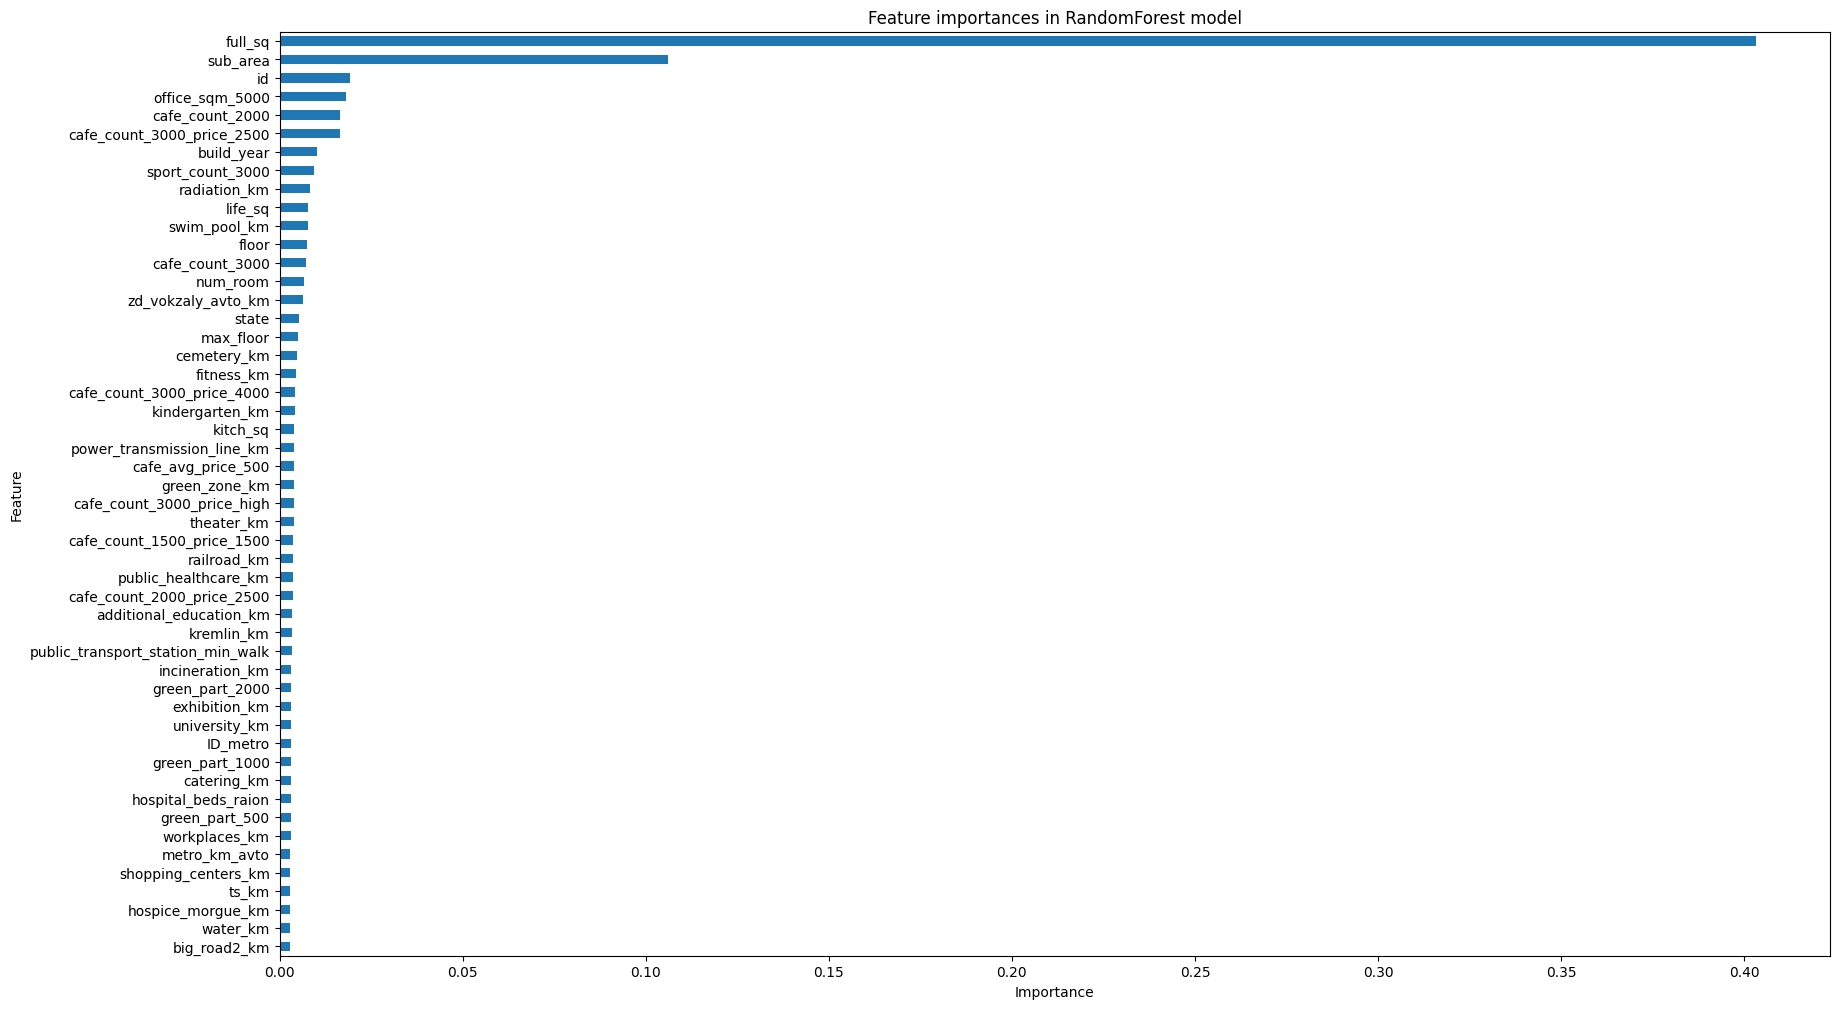

In [ ]:
# Feature Importance-לנסות לצמצמם משתנים ע"י המשתנים החשובים ביותר למודל בשילוב עם המשתנים עם הקרולציה הכי גבוהה
importances = rf_regressor_withNA.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
# יצירת הפלוט עם המשתנים הכי חשובים
plt.figure(figsize=(20, 12))
feature_importances[:50].sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importances in RandomForest model')
plt.show()

In [ ]:
# שילוב של המשתנים החשובים עם הקרולציה לרשימה אחת
combined_features = corr_target_f + list(feature_importances[:50].index)

combined_features = list(dict.fromkeys(combined_features))
combined_features.remove('price_doc')

In [ ]:
X4 = dtrain[combined_features]
y4 = dtrain['price_doc']

X4_train, X4_temp, y4_train, y4_temp = train_test_split(X4, y4, test_size=0.3, random_state=42)

X4_val, X4_test, y4_val, y4_test = train_test_split(X4_temp, y4_temp, test_size=0.5, random_state=42)

rf_regressor_important = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor_important.fit(X4_train, y4_train)

cv_scores4 = cross_val_score(rf_regressor_important, X4_val, y4_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores4 = np.sqrt(-cv_scores4)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores4}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores4)}")

Cross-Validation RMSE scores: [3302989.35726447 2764716.50467697 2622148.04230658 2294059.60211855
 3046454.98850998]
Mean Cross-Validation RMSE: 2806073.6989753097


<div dir="rtl">
בשלב זה ניסנו לשנות גישה ולנסות לעשות רגרסייה מסוגXGBoost
כמו ממוקדם בראנדום פורסט גם פה ניסנו לעשות כל פעם שינוי קטן למודל בשביל לראות האם הצלחנו לשפר את התוצאה בקאגל
המודל הראשון שהרצנו הוא מודל רק עם השינוים אשר עשינו בהתחלה בEDA של ניקוי נתונים והסידור שלהם,
לאחר מכאן ניסנו לקחת את המשתנים החשובים לXGBoost ולהריץ את המודל עליהם,
ובנוסף עשינו גם GRIDSEARCH על מנת למצוא את הפרמטרים הטובים למודל שלנו
ולסיום לקחנו את הפייצרים החדשים אשר יצרנו והסופנו אותו למודל

</div>

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

X_5 = dtrain.drop(['timestamp','dt','price_doc'] + new_features, axis=1)
y_5 = dtrain['price_doc']

X5_train, X5_temp, y5_train, y5_temp = train_test_split(X_5, y_5, test_size=0.3, random_state=42)

# Initialize the XGBRegressor
xgb_regressor = XGBRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X5_train, y5_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = grid_search.best_score_
print(f"Best score: {best_score}")

In [ ]:
X_5 = dtrain.drop(['timestamp','dt','price_doc'] + new_features, axis=1)
y_5 = dtrain['price_doc']
X5_train, X5_temp, y5_train, y5_temp = train_test_split(X_5, y_5, test_size=0.3, random_state=42)

X5_val, X5_test, y5_val, y5_test = train_test_split(X5_temp, y5_temp, test_size=0.5, random_state=42)
xgb_regressor = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
xgb_regressor.fit(X5_train, y5_train)

cv_scores5 = cross_val_score(xgb_regressor, X5_val, y5_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores5 = np.sqrt(-cv_scores5)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores5}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores5)}")


Cross-Validation RMSE scores: [3376184.89716455 2689837.78467833 2638629.58093229 2238670.93423733
 3045727.28197768]
Mean Cross-Validation RMSE: 2797810.095798035


In [ ]:
X7 = dtrain.drop(['timestamp','dt','price_doc'], axis=1)
y7 = dtrain['price_doc']

X7_train, X7_temp, y7_train, y7_temp = train_test_split(X7, y7, test_size=0.3, random_state=42)

X7_val, X7_test, y7_val, y7_test = train_test_split(X7_temp, y7_temp, test_size=0.5, random_state=42)
xgb_regressor_newfeutures = XGBRegressor(n_estimators=100, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, random_state=42)
xgb_regressor_newfeutures.fit(X7_train, y7_train)

cv_scores7 = cross_val_score(xgb_regressor_newfeutures, X7_val, y7_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores7 = np.sqrt(-cv_scores7)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores7}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores7)}")


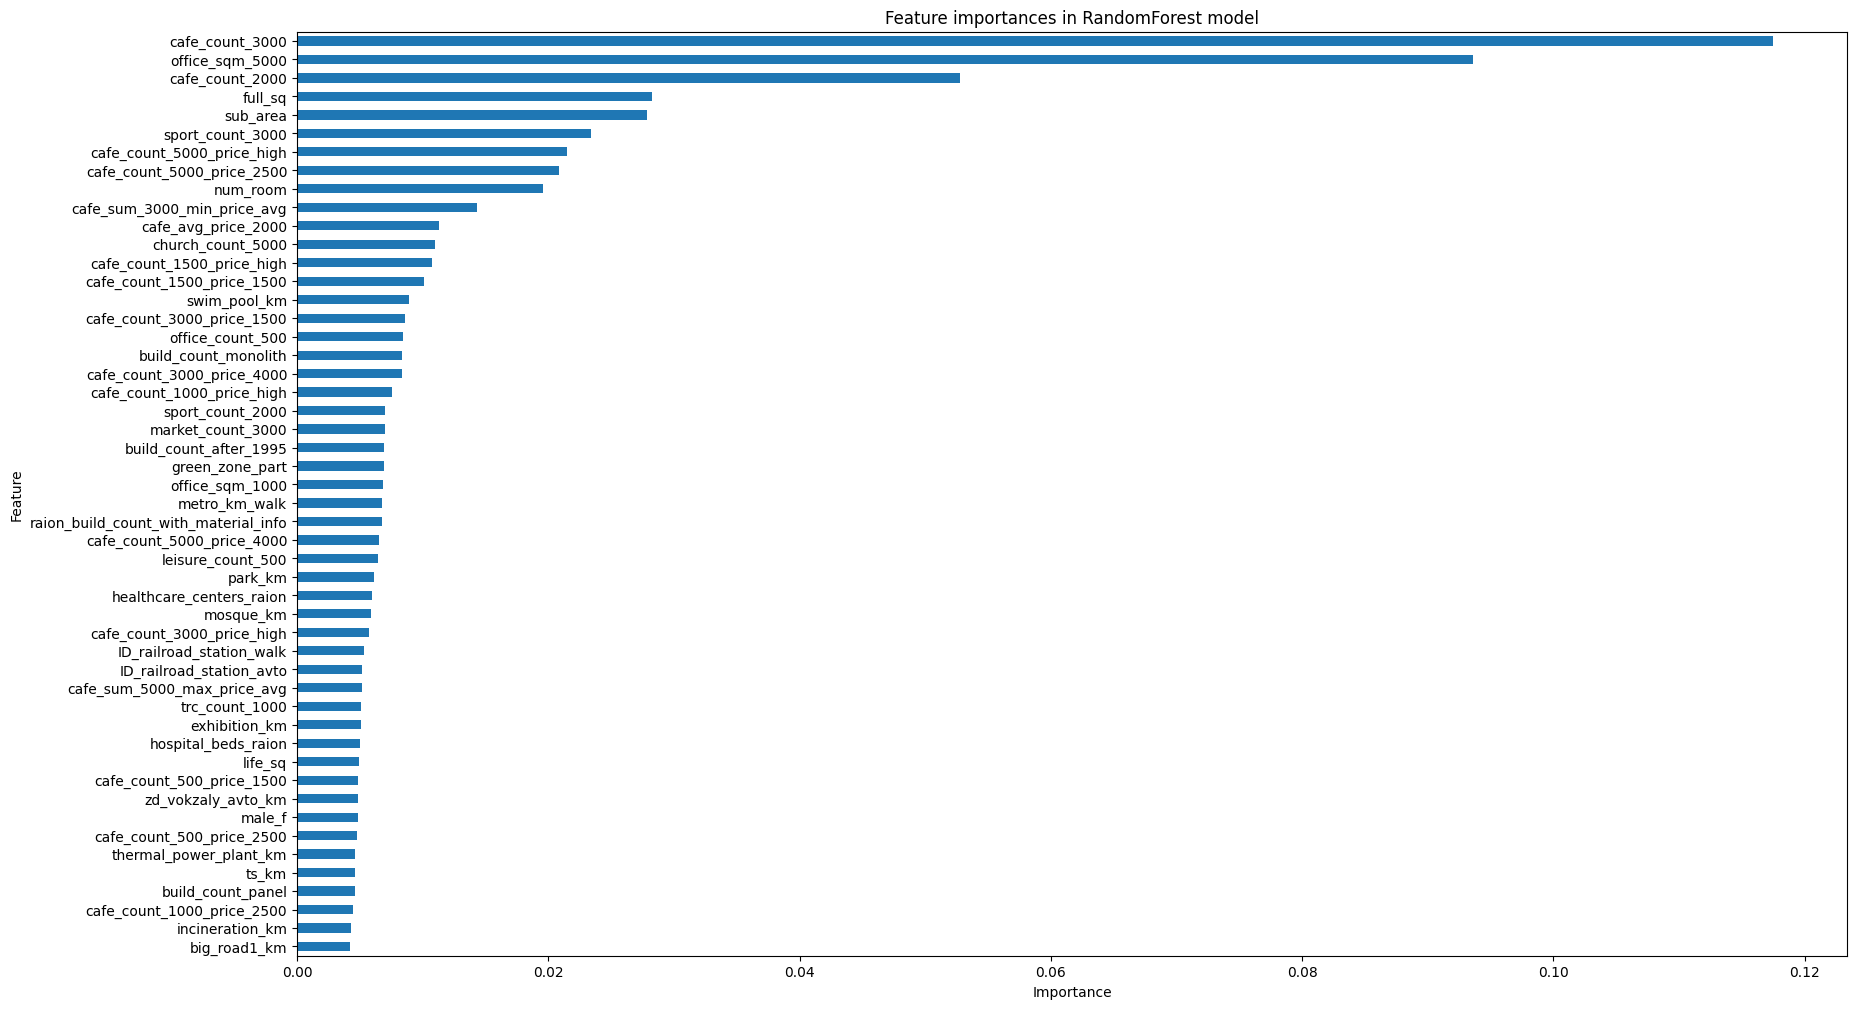

In [ ]:
# בדיקת המשנתים החשובים למודל XGB
importances_xgb = xgb_regressor.feature_importances_
feature_importances_xgb = pd.Series(importances_xgb, index=X5_train.columns).sort_values(ascending=False)
# יצירת פלוט למשתנים האלו
plt.figure(figsize=(20, 12))
feature_importances_xgb[:50].sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importances in RandomForest model')
plt.show()

In [ ]:
# שילוב של המשתנים החשובים עם הקרולציה לרשימה אחת
combined_features_xgb = corr_target_f + list(feature_importances_xgb[:50].index)

combined_features_xgb = list(dict.fromkeys(combined_features_xgb))
combined_features_xgb.remove('price_doc')

In [ ]:
X6= dtrain[combined_features_xgb]
y6 = dtrain['price_doc']

X6_train, X6_temp, y6_train, y6_temp = train_test_split(X6, y6, test_size=0.3, random_state=42)

X6_val, X6_test, y6_val, y6_test = train_test_split(X6_temp, y6_temp, test_size=0.5, random_state=42)
xgb_regressor_import = XGBRegressor(n_estimators=100, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, random_state=42)
xgb_regressor_import.fit(X6_train, y6_train)

cv_scores6 = cross_val_score(xgb_regressor, X6_val, y6_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores6 = np.sqrt(-cv_scores6)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores6}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores6)}")

Cross-Validation RMSE scores: [3354388.12670876 2729364.82124132 2652036.42535661 2398616.95110883
 3195069.31386286]
Mean Cross-Validation RMSE: 2865895.1276556742


In [ ]:

normalized_train = dtrain.copy()

numerical_cols = normalized_train.select_dtypes(include=[np.number]).columns

scaler = MinMaxScaler()

normalized_train[numerical_cols] = scaler.fit_transform(normalized_train[numerical_cols])




In [ ]:
#עבודה על דאטה מנורמלת
X8 = normalized_train.drop(['price_doc','dt','timestamp'], axis=1)
target_scaler = MinMaxScaler()
y8 = normalized_train['price_doc'].values.reshape(-1, 1)
y8 = target_scaler.fit_transform(y8)

X8_train, X8_temp, y8_train, y8_temp = train_test_split(X8, y8, test_size=0.3, random_state=42)
X8_val, X8_test, y8_val, y8_test = train_test_split(X8_temp, y8_temp, test_size=0.5, random_state=42)

xgb_regressor_normalised = XGBRegressor(n_estimators=100, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, random_state=42)

xgb_regressor_normalised.fit(X8_train, y8_train.ravel())

cv_scores8 = cross_val_score(xgb_regressor_normalised, X8_val, y8_val.ravel(), cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores8 = np.sqrt(-cv_scores8)

print(f"Cross-Validation RMSE scores: {cv_rmse_scores8}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores8)}")

Cross-Validation RMSE scores: [0.03002    0.02488327 0.02369948 0.02059078 0.02814356]
Mean Cross-Validation RMSE: 0.025467416211535178


In [ ]:
# המרת תאריכים לפורמט תאריך והוספת עמודה חדשה של שנת הרבעון
dtrain['timestamp'] = pd.to_datetime(dtrain['timestamp'])
dtrain['year_quarter'] = dtrain['timestamp'].dt.to_period('Q')

# חישוב המחיר הממוצע לרבעון השני של 2015 לנרמול
normalization_value = dtrain[dtrain['year_quarter'] == '2015Q2']['price_doc'].mean()

# נרמול המחירים בסט האימון
dtrain['normalized_price_doc'] = dtrain['price_doc'] / normalization_value


In [ ]:
#עבודה על דאטה שמנורמלת לפי הרבעון עם הממוצע של הרבעון השני של 2015
X9 = dtrain.drop(['timestamp','dt','price_doc','year_quarter','normalized_price_doc'], axis=1)
y9 = dtrain['normalized_price_doc']

X9_train, X9_temp, y9_train, y9_temp = train_test_split(X9, y9, test_size=0.3, random_state=42)

X9_val, X9_test, y9_val, y9_test = train_test_split(X9_temp, y9_temp, test_size=0.5, random_state=42)
xgb_regressor_2Qnoraml = XGBRegressor(n_estimators=100, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, random_state=42)
xgb_regressor_2Qnoraml.fit(X9_train, y9_train)

cv_scores9 = cross_val_score(xgb_regressor_2Qnoraml, X9_val, y9_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores9 = np.sqrt(-cv_scores9)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores9}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores9)}")


Cross-Validation RMSE scores: [0.41592941 0.34328817 0.32695641 0.27952494 0.38649213]
Mean Cross-Validation RMSE: 0.35043821329072505


In [ ]:
# חישוב מחיר למ"ר בדאטה פריים חדש והוספת עמודה חדשה
psqm = dtrain.copy()
imputer = SimpleImputer(strategy='median')

# השלמת ערכים חסרים בעמודת השטח הכולל של הבית בחציון
psqm['full_sq'] = imputer.fit_transform(psqm['full_sq'].values.reshape(-1, 1))
psqm['price_per_sqm'] = psqm['price_doc'] / psqm['full_sq']

# אימון מודל על מחיר למ"ר
psqm = psqm.drop(['timestamp','price_doc','dt'] + new_features, axis=1)

X10 = psqm.drop(['price_per_sqm','full_sq'], axis=1)
y10 = psqm['price_per_sqm']
X10_train, X10_temp, y10_train, y10_temp = train_test_split(X10, y10, test_size=0.3, random_state=42)

X10_val, X10_test, y10_val, y10_test = train_test_split(X10_temp, y10_temp, test_size=0.5, random_state=42)
xgb_regressor_psqm = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

xgb_regressor_psqm.fit(X10_train, y10_train)

cv_scores10 = cross_val_score(xgb_regressor_psqm, X10_val, y10_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores10 = np.sqrt(-cv_scores10)
print(f"Cross-Validation RMSE scores: {cv_rmse_scores10}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores10)}")



Cross-Validation RMSE scores: [44704.2662155  43570.09176145 45099.46289481 40447.5662986
 43134.786524  ]
Mean Cross-Validation RMSE: 43391.234738871266


In [ ]:
# פתיחת דאטה חדש לפי סוג הנכס
df_investment = dtrain[dtrain['product_type'] == 0]
df_owner = dtrain[dtrain['product_type'] == 1]

imputer = SimpleImputer(strategy='median')

# השלמת ערכים חסרים בעמודת השטח הכולל של הבית בחציון
df_investment['full_sq'] = imputer.fit_transform(df_investment['full_sq'].values.reshape(-1, 1))
df_owner['full_sq'] = imputer.fit_transform(df_owner['full_sq'].values.reshape(-1, 1))


In [ ]:
# אימון מודל על מחיר למ"ר לכל סוג נכס
X_investment = df_investment.drop(['timestamp','dt','price_doc', 'product_type', 'full_sq'] + new_features, axis=1)
y_investment = df_investment['price_doc'] / df_investment['full_sq']

X_owner = df_owner.drop(['timestamp','dt','price_doc', 'product_type', 'full_sq'] + new_features, axis=1)
y_owner = df_owner['price_doc'] / df_owner['full_sq']

X_investment_train, X_investment_temp, y_investment_train, y_investment_temp = train_test_split(X_investment, y_investment, test_size=0.3, random_state=42)
X_investment_val, X_investment_test, y_investment_val, y_investment_test = train_test_split(X_investment_temp, y_investment_temp, test_size=0.5, random_state=42)

X_owner_train, X_owner_temp, y_owner_train, y_owner_temp = train_test_split(X_owner, y_owner, test_size=0.3, random_state=42)
X_owner_val, X_owner_test, y_owner_val, y_owner_test = train_test_split(X_owner_temp, y_owner_temp, test_size=0.5, random_state=42)

xgb_regressor_investment = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
xgb_regressor_owner = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

xgb_regressor_investment.fit(X_investment_train, y_investment_train)
xgb_regressor_owner.fit(X_owner_train, y_owner_train)

cv_scores_investment = cross_val_score(xgb_regressor_investment, X_investment_val, y_investment_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_investment = np.sqrt(-cv_scores_investment)
print(f"Investment Cross-Validation RMSE scores: {cv_rmse_scores_investment}")
print(f"Investment Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores_investment)}")

cv_scores_owner = cross_val_score(xgb_regressor_owner, X_owner_val, y_owner_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_owner = np.sqrt(-cv_scores_owner)
print(f"owner Cross-Validation RMSE scores: {cv_rmse_scores_owner}")
print(f"owner Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores_owner)}")



Investment Cross-Validation RMSE scores: [50127.50701091 50281.82875797 53009.63676788 53953.91618008
 55148.63946397]
Investment Mean Cross-Validation RMSE: 52504.30563616174
owner Cross-Validation RMSE scores: [30706.53109577 19523.16945435 48586.27752682 21126.26129626
 16657.75643453]
owner Mean Cross-Validation RMSE: 27319.99916154505


<div dir="rtl">
בהתחלה כאשר עבדנו עם הראנדום פורסט השתפר לנו מהמודל ביססליין שעשינו ב1. אך רצינו לראות אם כמו במודל הביסליין מודל ה- הXGBoost יגרום לשיפור עם כל הדאטה.
לאחר שעשינו את הXGBoost ראינו באמת שיפור בתוצאות והחלטנו להמשיך עם זה.
בנוסף ידענו שערכים החסרים יכולים לפגוע בראנדום פורסט וגם אחרי טיפול בהם יצא לנו תוצאות יותר טוב בXGBoost
.XGBoost הוא שיטה מתקדמת שמשתמשת ברעיון של למידה רצופה של עצים, כלומר הוא לומד מהטעויות שלו ומשפר את עצמו בהמשך. בנוסף, יש ל-XGBoost מנגנונים מיוחדים שמונעים ממנו ללמוד "יתר על המידה" או להגיב בצורה קיצונית לנתונים שאינם טיפוסיים, דבר שמסייע לו לשמור על יציבות ועקביות בביצועים. בנוסף, XGBoost יכול להתמודד טוב יותר עם ערכים חסרים ולעבד מידע בצורה יעילה יותר, מה שהופך אותו למהיר ויעיל יותר מ- ראנדום פורסט במקרים רבים. בגלל כל אלה, לעיתים XGBoost מספק תוצאות טובות יותר לעומת ראנדום פורסט, במיוחד במקרים שבהם הקשר בין הנתונים למטרה הוא מורכב במיוחד.

</div>

התחלת שינוי הדאטה בשביל הטסט


In [ ]:
df_test1 = pd.read_csv('C:\\Users\\odedw\\OneDrive\\שולחן העבודה\בן גוריון\\עבודות הגשה בן גוריון\\שנה ג\\סטטיסטיקה\\למידת מכונה\\פרויקט סיום\\test_sber.csv')#df_test1['dt'] = pd.to_datetime(df_test1['timestamp'])
Id = df_test1['id']


df_test1 = df_test1.drop(['preschool_education_centers_raion','children_preschool'], axis=1, errors='ignore')
df_test1 = df_test1.drop(['ttk_km', 'sadovoe_km','bulvar_ring_km'], axis=1, errors='ignore')
df_test1 = df_test1.drop(['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_sum_1000_min_price_avg','cafe_sum_1000_max_price_avg','school_quota'], axis=1, errors='ignore')
df_test1 = df_test1.drop(['young_female','work_female','work_male','male_f','female_f'],axis =1)


In [ ]:
#חזרה על אותם פעולות מאימון המודל
df_test1.loc[df_test1['floor'] > df_test1['max_floor'], 'max_floor'] = np.nan

df_test1.loc[df_test1['life_sq'] > df_test1['full_sq'], 'life_sq'] = np.nan


df_test1.loc[df_test1['state'] > 6, 'state'] = 4
df_test1.loc[df_test1['build_year'] > 100000, 'build_year'] = 2007
df_test1.loc[(df_test1['num_room'] == 0) | (df_test1['num_room'] >= 10), 'num_room'] = np.nan
df_test1.loc[(df_test1['build_year'] < 300) | (df_test1['build_year'] >= 2022), 'build_year'] = np.nan

df_test1.loc[[601, 1896, 2791], 'life_sq'] = df_test1.loc[[601, 1896, 2791], 'full_sq']

df_test1.loc[df_test1['life_sq'] > df_test1['full_sq'], 'life_sq'] = np.nan

for col in ['life_sq', 'full_sq']:
    df_test1.loc[df_test1[col] < 5, col] = np.nan

df_test1.loc[(df_test1['kitch_sq'] >= df_test1['life_sq']) | df_test1['kitch_sq'].isin([0, 1]), 'kitch_sq'] = np.nan

df_test1.loc[(df_test1['full_sq'] > 150) & (df_test1['life_sq'] / df_test1['full_sq'] < 0.3), 'full_sq'] = np.nan

df_test1.loc[df_test1['life_sq'] > 200, ['life_sq', 'full_sq']] = np.nan

df_test1.loc[df_test1['max_floor'] == 0, 'max_floor'] = np.nan

In [ ]:
label_enc = LabelEncoder()
categorical_columns_test = df_test1.select_dtypes(include=['object']).columns

for col in categorical_columns_test:
    if col != 'timestamp' and col != 'sub_area' and 'dt':
        df_test1[col] = label_enc.fit_transform(df_test1[col].astype(str))

df_test1['sub_area'] = target_enc.transform(df_test1['sub_area'])


In [ ]:
df_test1['area_km'] = df_test1['area_m'] / 1000000
df_test1['density'] = df_test1['raion_popul'] / df_test1['area_km']



In [ ]:
# convert the timestamp to datetime
df_test1['dt'] = pd.to_datetime(df_test1['timestamp'].copy())
# נקודת ההתחלה של הזמן
reference_date = df_test1['dt'].min()

# ההפרש מנקודת ההתחלה
df_test1['day_count'] = (df_test1['dt'] - reference_date).dt.days

# Residential & kitchen area to total area ratio:
df_test1['resident_to_total_ratio'] = df_test1['life_sq']/df_test1['full_sq']
df_test1['kitchen_to_total_ratio'] = df_test1['kitch_sq']/df_test1['full_sq']

df_test1['avg_room_area'] = df_test1['life_sq']/df_test1['num_room']

df_test1['extra_area'] = df_test1['full_sq'] - df_test1['life_sq']

# floor & max_floor to 'floor_rel_total'
df_test1['floor_rel_total'] = df_test1['floor'] / df_test1['max_floor']



In [ ]:
dtest = df_test1.copy()
dtest = dtest.drop(['timestamp','dt'] + new_features, axis=1)
imputer = SimpleImputer(strategy='median')

# השלמת ערכים חסרים בעמודת השטח הכולל של הבית בחציון
dtest['full_sq'] = imputer.fit_transform(dtest['full_sq'].values.reshape(-1, 1))

#החלפת ערכים חריגים בערך הנכס ברנדומליות חצי חצי
indices = dtest[dtest['product_type'] == 2].index

midpoint = len(indices) // 2

dtest.loc[indices[:midpoint], 'product_type'] = 0

dtest.loc[indices[midpoint:], 'product_type'] = 1




In [ ]:
# בדיקה האם יש אותם פייצרים בפיינל טסט והסידור שלהם
columns_diff_df1 = dtrain.columns.difference(df_test1.columns)
columns_diff_df2 = dtest.columns.difference(dtrain.columns)

print("Columns in df1 but not in df2:", columns_diff_df1)
print("Columns in df2 but not in df1:", columns_diff_df2)
final_no_price = dtrain.drop(['price_doc','timestamp','dt','full_sq'] + new_features,axis=1)

# Define the desired order of columns
desired_order = final_no_price.columns

finaltest= dtest[desired_order]


Columns in df1 but not in df2: Index(['price_doc'], dtype='object')
Columns in df2 but not in df1: Index(['id'], dtype='object')


In [ ]:
#הסתכלות אחרונה לבדוק האם יש ערכים חריגים לפני העלאה
finaltest.describe()

full_sq      life_sq        floor    max_floor     material  \
count  7658.000000  6146.000000  7662.000000  7019.000000  7662.000000   
mean     53.698436    33.936992     7.652571    13.666192     1.854216   
std      19.978035    15.892010     5.099418     5.866484     1.517171   
min      10.000000     8.100000     1.000000     1.000000     1.000000   
25%      39.200000    20.700000     4.000000     9.000000     1.000000   
50%      50.420000    30.600000     7.000000    14.000000     1.000000   
75%      63.300000    42.600000    11.000000    17.000000     2.000000   
max     403.000000   197.000000    41.000000    48.000000     6.000000   

        build_year     num_room     kitch_sq        state  product_type  ...  \
count  6055.000000  7661.000000  5502.000000  6968.000000   7662.000000  ...   
mean   1988.625764     1.874168     8.610473     1.985792      0.351997  ...   
std      21.899159     0.812492     2.794423     0.820086      0.486559  ...   
min    1875.000000     1.000000     1.100000     1.000000      0.000000  ...   
25%    1969.000000     1.000000     6.300000     1.000000      0.000000  ...   
50%    1986.000000     2.000000     8.500000     2.000000      0.000000  ...   
75%    2013.000000     2.000000    10.000000     3.000000      1.000000  ...   
max    2019.000000     7.000000    67.000000     4.000000      2.000000  ...   

       cafe_count_5000_price_4000  cafe_count_5000_price_high  \
count                 7662.000000                 7662.000000   
mean                    12.152310                    2.007439   
std                     29.590097                    5.664540   
min                      0.000000                    0.000000   
25%                      1.000000                    0.000000   
50%                      2.000000                    0.000000   
75%                      5.000000                    1.000000   
max                    145.000000                   29.000000   

       big_church_count_5000  church_count_5000  mosque_count_5000  \
count            7662.000000        7662.000000        7662.000000   
mean               16.749152          33.109371           0.412425   
std                30.706709          49.734993           0.608938   
min                 0.000000           0.000000           0.000000   
25%                 3.000000          10.000000           0.000000   
50%                 7.000000          17.000000           0.000000   
75%                13.000000          29.000000           1.000000   
max               150.000000         249.000000           2.000000   

       leisure_count_5000  sport_count_5000  market_count_5000      area_km  \
count         7662.000000       7662.000000        7662.000000  7662.000000   
mean             9.639650         56.235839           6.330723    17.685764   
std             21.499687         47.632547           4.956223    22.107276   
min              0.000000          0.000000           0.000000     2.081628   
25%              0.000000         12.000000           2.000000     7.307411   
50%              2.000000         51.000000           5.000000    10.053052   
75%              7.000000         79.000000          11.000000    17.881914   
max            105.000000        212.000000          21.000000   206.071809   

            density  
count   7662.000000  
mean    9953.554884  
std     6815.714351  
min       15.279744  
25%     4109.002223  
50%    10251.807599  
75%    14434.589519  
max    28297.797229  

[8 rows x 276 columns]

<div dir="rtl">
העלאת קבצי הטסט 
</div>

In [ ]:
#פעולה סופית לפני העלאה
predictions_rf = rf_regressor_withNA.predict(finaltest)

submission_rf_fulltest5 = pd.DataFrame({
    'Id': Id,  
    'price_doc': predictions_rf  
})

submission_rf_fulltest5.to_csv('submission_rf_fulltest5.csv', index=False)

In [ ]:
#פרדיקציה לפי כל הערכים כולל נתונים חסרים
predictions_xgb_grid = xgb_regressor.predict(finaltest)

predictions_xgb_grid2 = predictions_xgb_grid * 0.973


submission_xgb_grid2= pd.DataFrame({
    'Id': Id,  
    'price_doc': predictions_xgb_grid2  
})


submission_xgb_grid2.to_csv('submission_xgb_grid2.csv', index=False)

In [ ]:
#פרדיקציה לפי מחיר למ"ר
predictions_xgb_psqm = xgb_regressor_psqm.predict(finaltest)

predictions_xgb_psqm = predictions_xgb_psqm * dtest['full_sq']*0.965

submission_xgb_psqm= pd.DataFrame({
    'Id': Id,  
    'price_doc': predictions_xgb_psqm  
})


submission_xgb_psqm.to_csv('submission_xgb_psqm.csv', index=False)

In [ ]:
#פרדיקציה לפי סוג נכס ומחיר למ"ר
test_investment = finaltest[finaltest['product_type'] == 0]
test_owner = finaltest[finaltest['product_type'] == 1]

test_investment = test_investment.drop(['product_type'], axis=1)
test_owner = test_owner.drop(['product_type'], axis=1)

investment_ids = dtest[dtest['product_type'] == 0]['id']
owner_ids = dtest[dtest['product_type'] == 1]['id']

predictions_investment = xgb_regressor_investment.predict(test_investment) * dtest[dtest['product_type'] == 0]['full_sq'] * 0.97
predictions_owner = xgb_regressor_owner.predict(test_owner) * dtest[dtest['product_type'] == 1]['full_sq'] *0.968

investment_predictions_df = pd.DataFrame({'id': investment_ids, 'price_doc': predictions_investment})
owner_predictions_df = pd.DataFrame({'id': owner_ids, 'price_doc': predictions_owner})
submission_xgb_psqm_pt = pd.concat([investment_predictions_df, owner_predictions_df])
submission_xgb_psqm_pt = submission_xgb_psqm_pt.sort_values('id')


submission_xgb_psqm_pt.to_csv('submission_xgb_psqm_pt.csv', index=False)

In [ ]:
#פרדיקציה על ידי שילוב מודלים
best_predictions =(( predictions_xgb_psqm +  submission_xgb_psqm_pt['price_doc'])/2)

submission_xgb_best_predictions = pd.DataFrame({
    'Id': Id,  
    'price_doc': best_predictions  
})


submission_xgb_best_predictions.to_csv('submission_xgb_best_predictions.csv', index=False)


In [ ]:
#פרדיקציה לפי טסט מנורמל
max_price = dtrain['price_doc'].max()

test_data_normalized = finaltest.copy()
numerical_cols = test_data_normalized.select_dtypes(include=[np.number]).columns


scaler_test = MinMaxScaler()


test_data_normalized[numerical_cols] = scaler_test.fit_transform(test_data_normalized[numerical_cols])


test_predictions = xgb_regressor_normalised.predict(test_data_normalized)

test_predictions = test_predictions * max_price



submission_xgb_normalized = pd.DataFrame({
    'id': Id,
    'price_doc': test_predictions.ravel()  # ravel() is used to convert the 2D array back to 1D
})

# Save the submission DataFrame to a CSV file
submission_xgb_normalized.to_csv('submission_xgb_normalized.csv', index=False)